# Exploratory Data Analysis (EDA) untuk Dataset Diabetes

## Anggota Kelompok
- Michael Angello Qadosy Riyadi - 1202230014
- Adistya Rahayu - 1202239001
- Ahsha Aisna Al Wafi - 1202230035
- Kadek Gandhi Wahyu Jaya Suastika - 1202230017

## Pendahuluan
Dataset ini berisi informasi medis pasien terkait diagnosis diabetes, dikumpulkan dari Medical City Hospital dan Specializes Center for Endocrinology and Diabetes-Al-Kindy Teaching Hospital di Irak. Tujuan analisis ini adalah memahami karakteristik data secara mendalam untuk mendukung penerapan model **Naive Bayes** dan **Decision Tree** dalam klasifikasi status diabetes (Diabetic, Non-Diabetic, atau Predict-Diabetic).

### Deskripsi Dataset
Dataset terdiri dari 14 kolom:
- **ID**: Identifikasi unik.
- **No_Pation**: Nomor pasien.
- **Gender**: Jenis kelamin (M/F).
- **AGE**: Usia pasien.
- **Urea**: Kadar urea.
- **Cr**: Rasio kreatinin.
- **HbA1c**: Kadar HbA1c.
- **Chol**: Kolesterol total.
- **TG**: Trigliserida.
- **HDL**: Kolesterol HDL.
- **LDL**: Kolesterol LDL.
- **VLDL**: Kolesterol VLDL.
- **BMI**: Indeks Massa Tubuh.
- **CLASS**: Klasifikasi diabetes (Y: Diabetic, N: Non-Diabetic, P: Predict-Diabetic).

## Langkah-langkah EDA
Langkah-langkah ini dirancang untuk memenuhi kebutuhan model Naive Bayes dan Decision Tree:
- **Naive Bayes** (Gaussian Naive Bayes) mengasumsikan fitur numerik berdistribusi normal dan independen. Kita perlu memeriksa distribusi, korelasi, dan ketidakseimbangan kelas.
- **Decision Tree** tidak sensitif terhadap distribusi atau skala, tetapi dipengaruhi oleh outlier dan ketidakseimbangan kelas. Kita perlu memeriksa outlier dan distribusi kelas target.

1. Memuat dataset dan inspeksi awal.
2. Memeriksa missing values dan duplikasi.
3. Analisis fitur kategorikal (Gender).
4. Statistik deskriptif dan analisis distribusi fitur numerik (dengan Q-Q plot).
5. Deteksi outlier menggunakan box plot dan IQR.
6. Analisis distribusi kelas target.
7. Visualisasi hubungan fitur numerik dan kategorikal dengan kelas target.
8. Uji statistik untuk signifikansi fitur.
9. Analisis korelasi antar fitur numerik.

In [33]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [34]:
# Memuat dataset
df = pd.read_csv('Dataset of Diabetes.csv')

In [35]:
# 1. Inspeksi Awal
# Tujuan: Memahami struktur dataset, tipe data, dan memastikan data dimuat dengan benar.
print('### Informasi Dataset ###')
print(df.info())
print('\n### 5 Baris Pertama Dataset ###')
print(df.head())

### Informasi Dataset ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB
None

### 5 Baris Pertama Dataset ###
    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   

In [36]:
# 2. Cek Missing Values dan Duplikasi
# Tujuan: Mengidentifikasi data yang hilang atau duplikat.
print('\n### Missing Values ###')
missing_stats = df.isnull().sum()
print(missing_stats)
print(f'\nTotal missing values: {missing_stats.sum()}')
# Visualisasi Missing Values (jika ada)
if missing_stats.sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Heatmap Missing Values')
    plt.show()

print('\n### Jumlah Duplikasi ###')
duplicates_count = df.duplicated().sum()
print(f'Jumlah baris duplikat: {duplicates_count}')
print(f'Persentase duplikat: {(duplicates_count / len(df)) * 100:.2f}%')


### Missing Values ###
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Total missing values: 0

### Jumlah Duplikasi ###
Jumlah baris duplikat: 0
Persentase duplikat: 0.00%



### Distribusi Gender ###
Gender
M    565
F    434
f      1
Name: count, dtype: int64
Proporsi Gender:
Gender
M    56.50
F    43.40
f     0.10
Name: count, dtype: object%


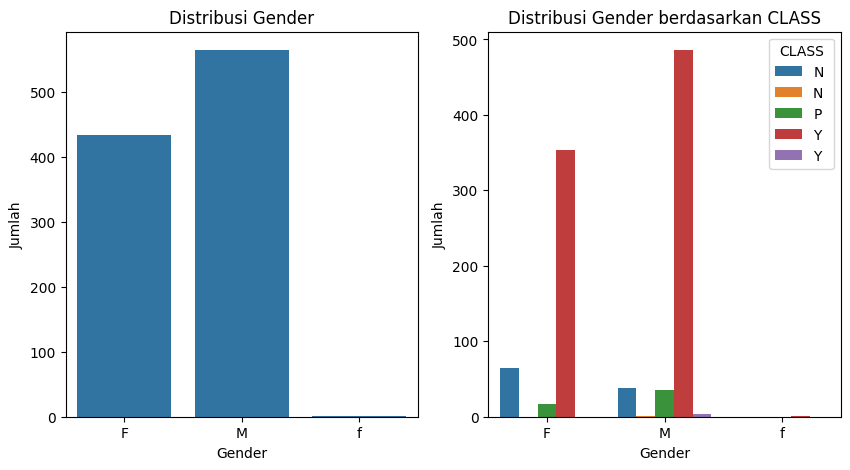

In [37]:
# 3. Analisis Fitur Kategorikal (Gender)
# Tujuan: Memahami distribusi Gender dan hubungannya dengan CLASS.
print('\n### Distribusi Gender ###')
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print(f'Proporsi Gender:\n{(gender_counts / len(df) * 100).map("{:.2f}".format)}%')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='CLASS', data=df)
plt.title('Distribusi Gender berdasarkan CLASS')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()


### Statistik Deskriptif Fitur Numerik ###
               AGE         Urea           Cr        HbA1c         Chol  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     53.528000     5.124743    68.943000     8.281160     4.862820   
std       8.799241     2.935165    59.984747     2.534003     1.301738   
min      20.000000     0.500000     6.000000     0.900000     0.000000   
25%      51.000000     3.700000    48.000000     6.500000     4.000000   
50%      55.000000     4.600000    60.000000     8.000000     4.800000   
75%      59.000000     5.700000    73.000000    10.200000     5.600000   
max      79.000000    38.900000   800.000000    16.000000    10.300000   

                TG          HDL          LDL         VLDL          BMI  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      2.349610     1.204750     2.609790     1.854700    29.578020  
std       1.401176     0.660414     1.115102     3.663599     4.962388

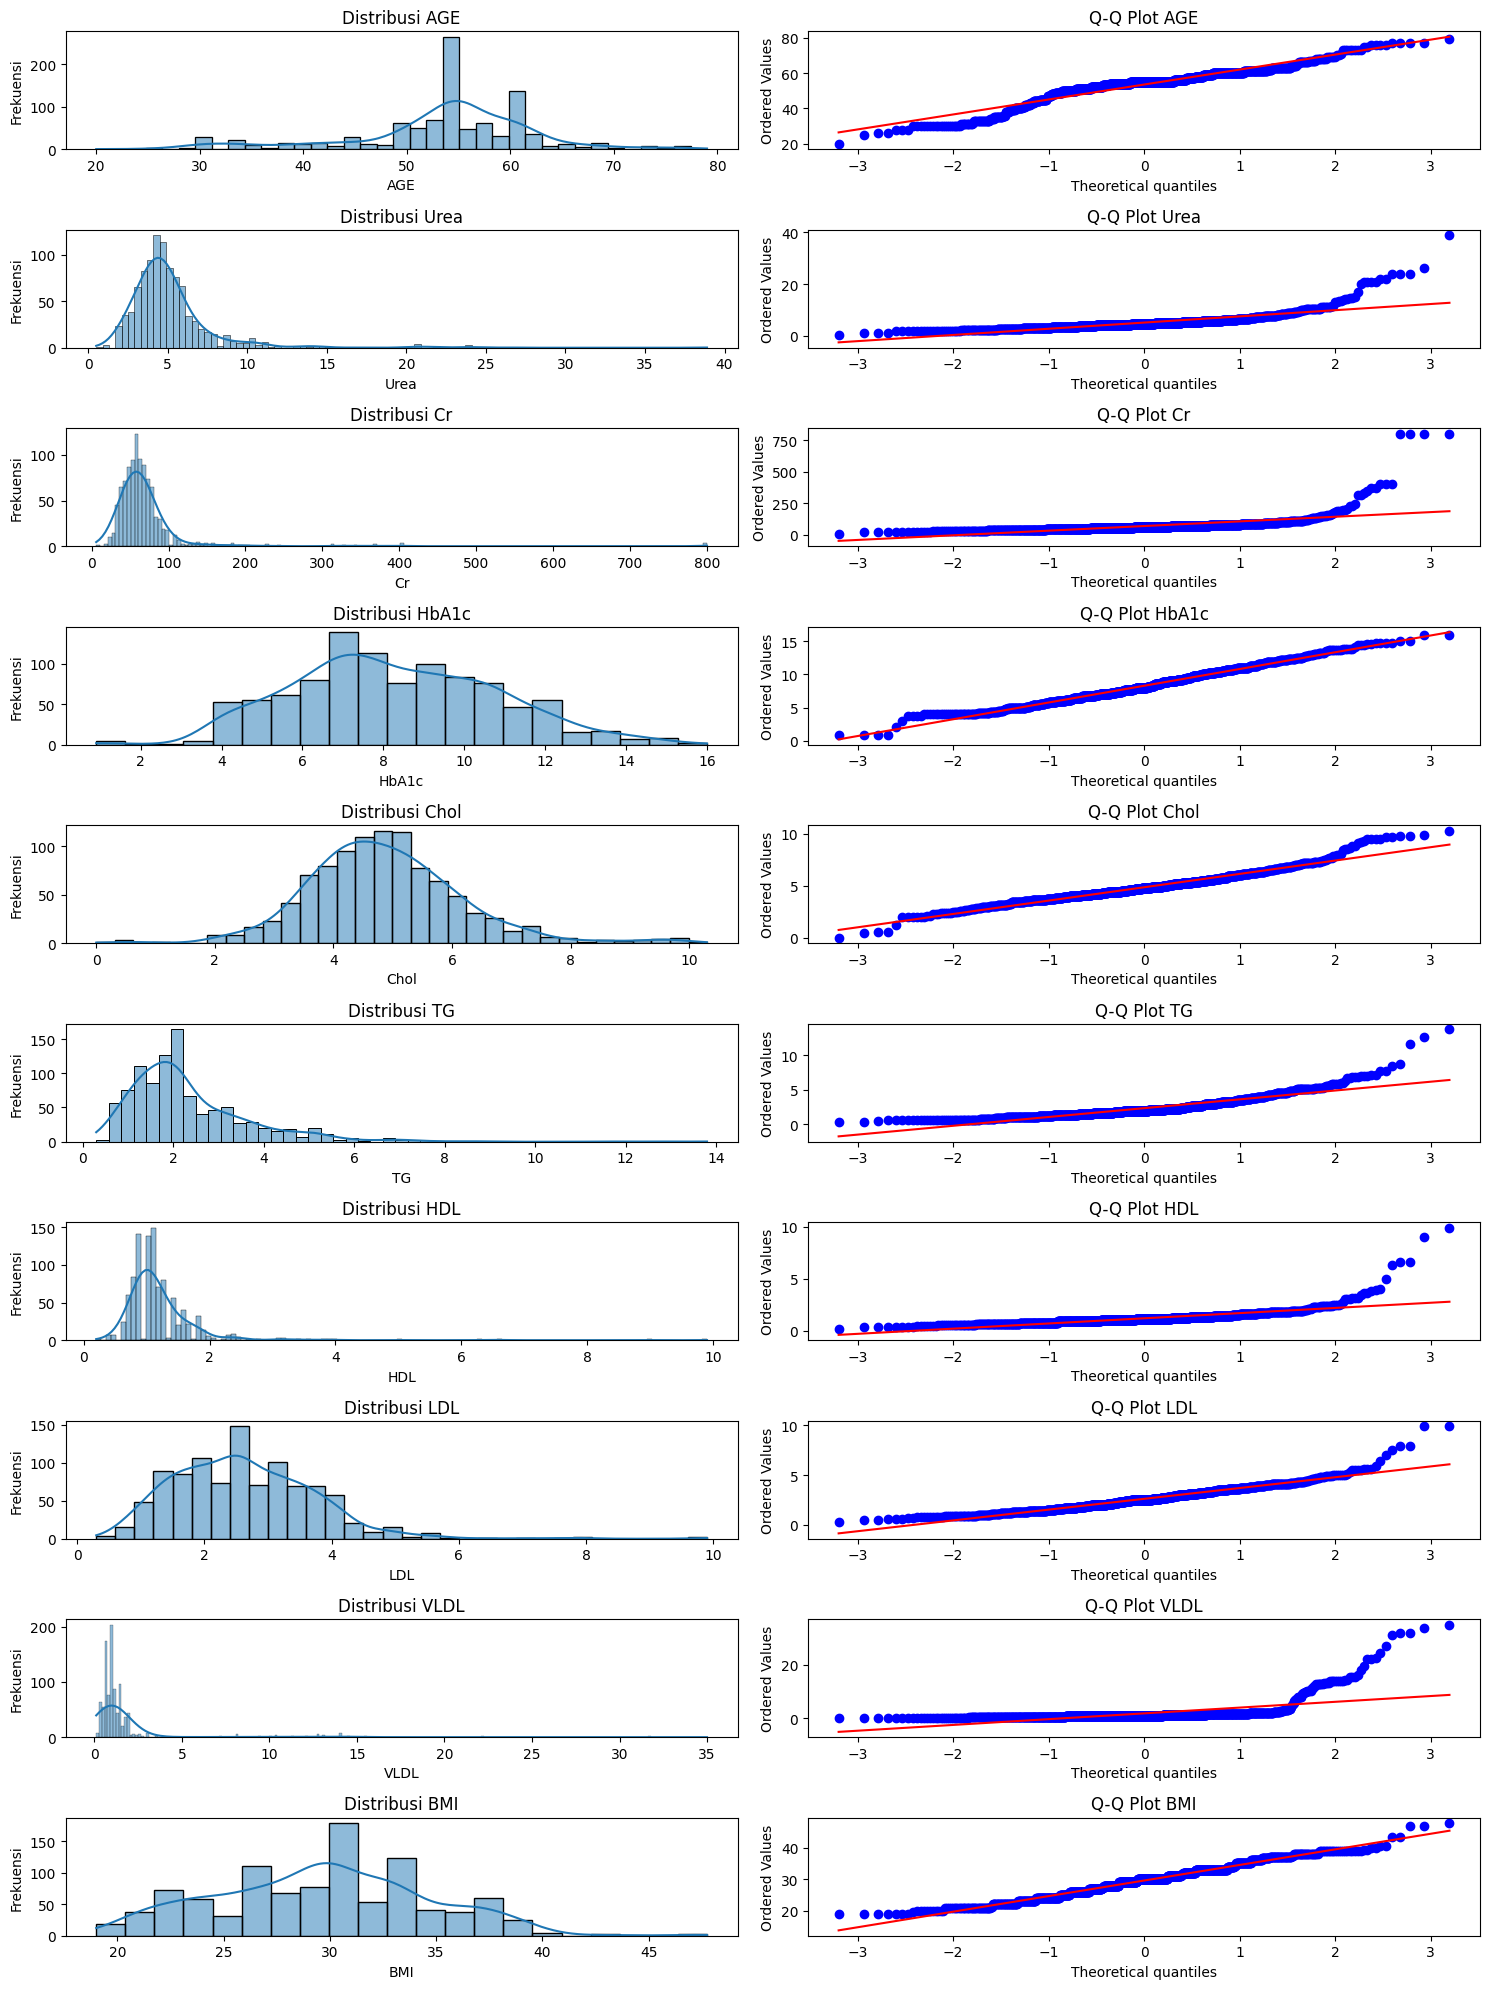


### Rekomendasi Transformasi berdasarkan Skewness ###
AGE: Skewness = -0.82 -> Tidak diperlukan transformasi khusus.
Urea: Skewness = 4.30 -> Disarankan transformasi (log, sqrt, atau power) untuk Naive Bayes.
Cr: Skewness = 8.47 -> Disarankan transformasi (log, sqrt, atau power) untuk Naive Bayes.
HbA1c: Skewness = 0.22 -> Tidak diperlukan transformasi khusus.
Chol: Skewness = 0.62 -> Tidak diperlukan transformasi khusus.
TG: Skewness = 2.30 -> Disarankan transformasi (log, sqrt, atau power) untuk Naive Bayes.
HDL: Skewness = 6.28 -> Disarankan transformasi (log, sqrt, atau power) untuk Naive Bayes.
LDL: Skewness = 1.15 -> Disarankan transformasi (log, sqrt, atau power) untuk Naive Bayes.
VLDL: Skewness = 5.35 -> Disarankan transformasi (log, sqrt, atau power) untuk Naive Bayes.
BMI: Skewness = 0.13 -> Tidak diperlukan transformasi khusus.


In [38]:
# 4. Statistik Deskriptif dan Distribusi Fitur Numerik
numerical_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
print('\n### Statistik Deskriptif Fitur Numerik ###')
print(df[numerical_cols].describe())

# Visualisasi Distribusi dengan Histogram dan Q-Q Plot
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(10, 2, 2*i-1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

    # Statistik Deskriptif
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    skewness = df[col].skew()
    minimum = df[col].min()
    maksimum = df[col].max()

    print(f'\n### Statistik Deskriptif {col} (untuk Histogram) ###')
    print(f'Mean: {mean:.2f}')
    print(f'Median: {median:.2f}')
    print(f'Standar Deviasi: {std:.2f}')
    print(f'Skewness: {skewness:.2f}', end=' ')

    if abs(skewness) > 1:
        print('=> Distribusi tidak normal (skewness tinggi).')
    elif 0.5 < abs(skewness) <= 1:
        print('=> Distribusi agak miring.')
    else:
        print('=> Distribusi mendekati normal.')

    print(f'Minimum: {minimum:.2f}')
    print(f'Maksimum: {maksimum:.2f}')

    # Q-Q Plot
    plt.subplot(10, 2, 2*i)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot {col}')
plt.tight_layout()
plt.show()

# Rekomendasi Transformasi berdasarkan Skewness
print('\n### Rekomendasi Transformasi berdasarkan Skewness ###')
for col in numerical_cols:
    skewness = df[col].skew()
    if abs(skewness) > 1:
        print(f'{col}: Skewness = {skewness:.2f} -> Disarankan transformasi (log, sqrt, atau power) untuk Naive Bayes.')
    else:
        print(f'{col}: Skewness = {skewness:.2f} -> Tidak diperlukan transformasi khusus.')


### Statistik Deskriptif AGE (untuk Box Plot) ###
Q1 (25%): 51.00
Q3 (75%): 59.00
IQR: 8.00
Batas Bawah: 39.00
Batas Atas: 71.00
Jumlah outlier: 98
Persentase outlier: 9.80%

### Statistik Deskriptif Urea (untuk Box Plot) ###
Q1 (25%): 3.70
Q3 (75%): 5.70
IQR: 2.00
Batas Bawah: 0.70
Batas Atas: 8.70
Jumlah outlier: 65
Persentase outlier: 6.50%

### Statistik Deskriptif Cr (untuk Box Plot) ###
Q1 (25%): 48.00
Q3 (75%): 73.00
IQR: 25.00
Batas Bawah: 10.50
Batas Atas: 110.50
Jumlah outlier: 52
Persentase outlier: 5.20%

### Statistik Deskriptif HbA1c (untuk Box Plot) ###
Q1 (25%): 6.50
Q3 (75%): 10.20
IQR: 3.70
Batas Bawah: 0.95
Batas Atas: 15.75
Jumlah outlier: 6
Persentase outlier: 0.60%

### Statistik Deskriptif Chol (untuk Box Plot) ###
Q1 (25%): 4.00
Q3 (75%): 5.60
IQR: 1.60
Batas Bawah: 1.60
Batas Atas: 8.00
Jumlah outlier: 27
Persentase outlier: 2.70%

### Statistik Deskriptif TG (untuk Box Plot) ###
Q1 (25%): 1.50
Q3 (75%): 2.90
IQR: 1.40
Batas Bawah: -0.60
Batas Atas: 5.00
Jumla

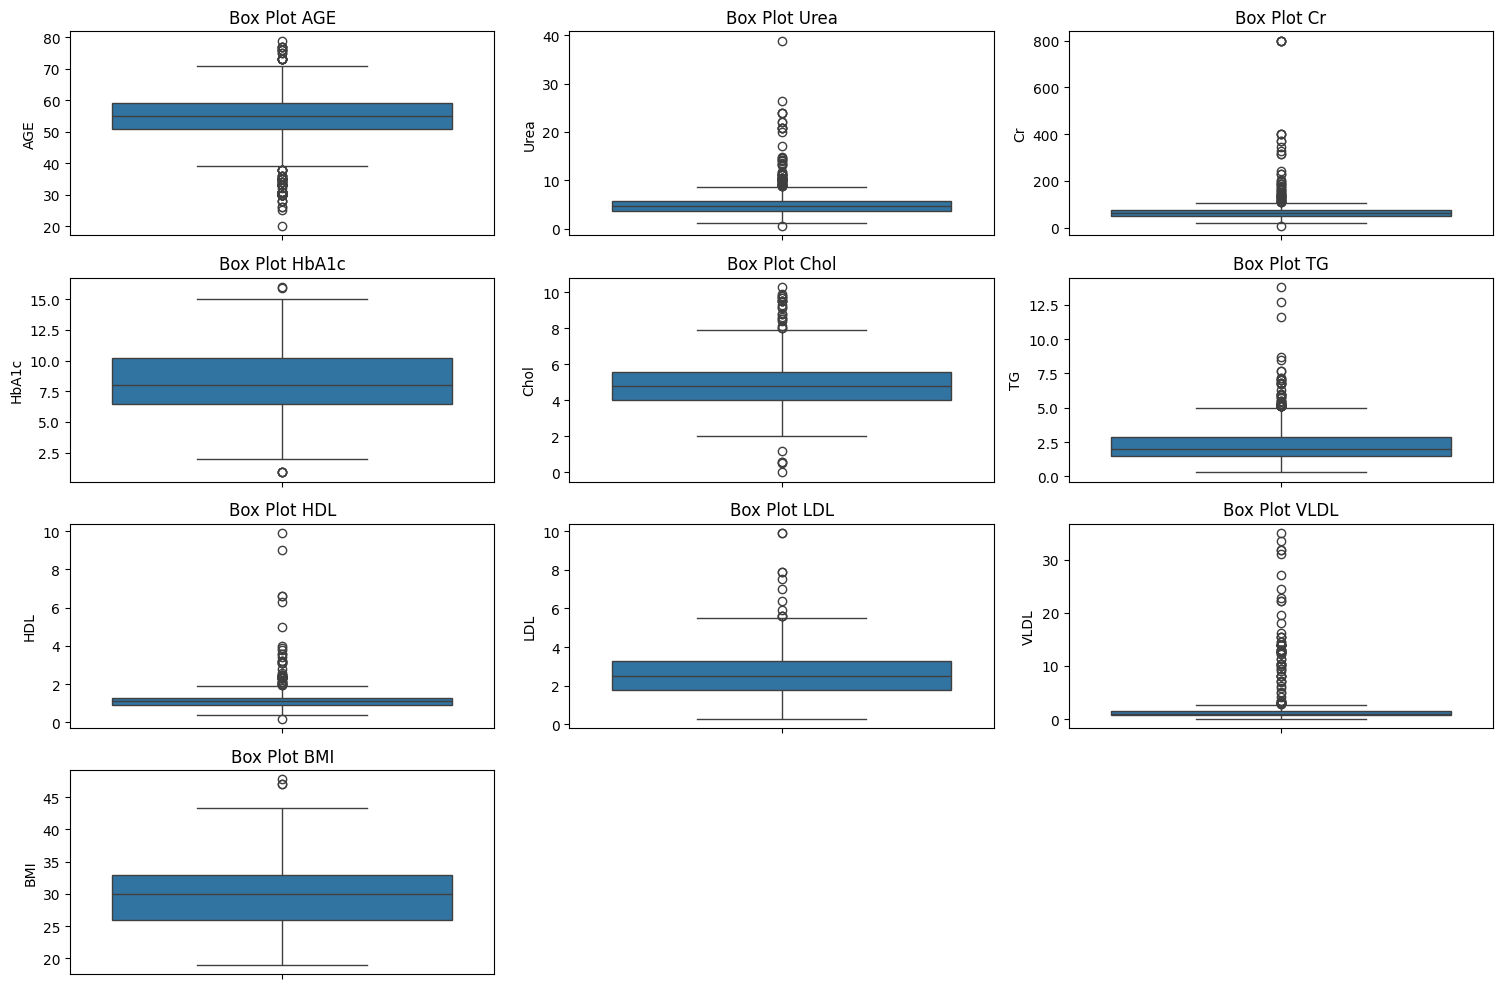

In [39]:
# 5. Deteksi Outlier dengan Box Plot dan IQR
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot {col}')
    plt.ylabel(col)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f'\n### Statistik Deskriptif {col} (untuk Box Plot) ###')
    print(f'Q1 (25%): {Q1:.2f}')
    print(f'Q3 (75%): {Q3:.2f}')
    print(f'IQR: {IQR:.2f}')
    print(f'Batas Bawah: {lower_bound:.2f}')
    print(f'Batas Atas: {upper_bound:.2f}')
    print(f'Jumlah outlier: {len(outliers)}')
    print(f'Persentase outlier: {(len(outliers) / len(df)) * 100:.2f}%')
plt.tight_layout()
plt.show()


### Statistik Deskriptif Distribusi Kelas ###
CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64
Total sampel: 1000
Proporsi kelas:
CLASS
Y     84.00
N     10.20
P      5.30
Y      0.40
N      0.10
Name: count, dtype: object%


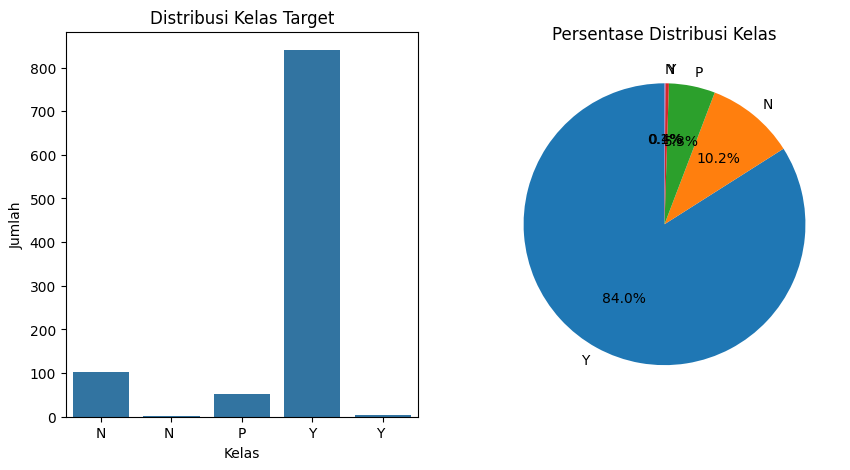


### Rasio Ketidakseimbangan Kelas ###
Rasio minoritas/mayoritas: 0.00


In [40]:
# 6. Analisis Distribusi Kelas Target
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='CLASS', data=df)
plt.title('Distribusi Kelas Target')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
print('\n### Statistik Deskriptif Distribusi Kelas ###')
class_counts = df['CLASS'].value_counts()
print(class_counts)
print(f'Total sampel: {len(df)}')
# Perbaikan: Memformat proporsi kelas dengan benar
print(f'Proporsi kelas:\n{(class_counts / len(df) * 100).map("{:.2f}".format)}%')

plt.subplot(1, 2, 2)
df['CLASS'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Persentase Distribusi Kelas')
plt.ylabel('')
plt.show()

min_class = class_counts.min()
max_class = class_counts.max()
print(f'\n### Rasio Ketidakseimbangan Kelas ###')
print(f'Rasio minoritas/mayoritas: {min_class / max_class:.2f}')


### Statistik Deskriptif AGE per Kelas ###
Kelas N:
  Mean: 44.29
  Median: 44.00
  Standar Deviasi: 9.44
Kelas N :
  Mean: 38.00
  Median: 38.00
  Standar Deviasi: nan
Kelas P:
  Mean: 43.28
  Median: 48.00
  Standar Deviasi: 7.76
Kelas Y:
  Mean: 55.39
  Median: 55.00
  Standar Deviasi: 7.44
Kelas Y :
  Mean: 38.25
  Median: 34.50
  Standar Deviasi: 11.09

### Statistik Deskriptif Urea per Kelas ###
Kelas N:
  Mean: 4.67
  Median: 4.40
  Standar Deviasi: 2.53
Kelas N :
  Mean: 6.10
  Median: 6.10
  Standar Deviasi: nan
Kelas P:
  Mean: 4.51
  Median: 4.40
  Standar Deviasi: 2.02
Kelas Y:
  Mean: 5.22
  Median: 4.60
  Standar Deviasi: 3.03
Kelas Y :
  Mean: 5.22
  Median: 5.40
  Standar Deviasi: 1.72

### Statistik Deskriptif Cr per Kelas ###
Kelas N:
  Mean: 62.60
  Median: 55.00
  Standar Deviasi: 30.10
Kelas N :
  Mean: 83.00
  Median: 83.00
  Standar Deviasi: nan
Kelas P:
  Mean: 66.08
  Median: 59.00
  Standar Deviasi: 41.57
Kelas Y:
  Mean: 69.89
  Median: 60.50
  Standar Devia

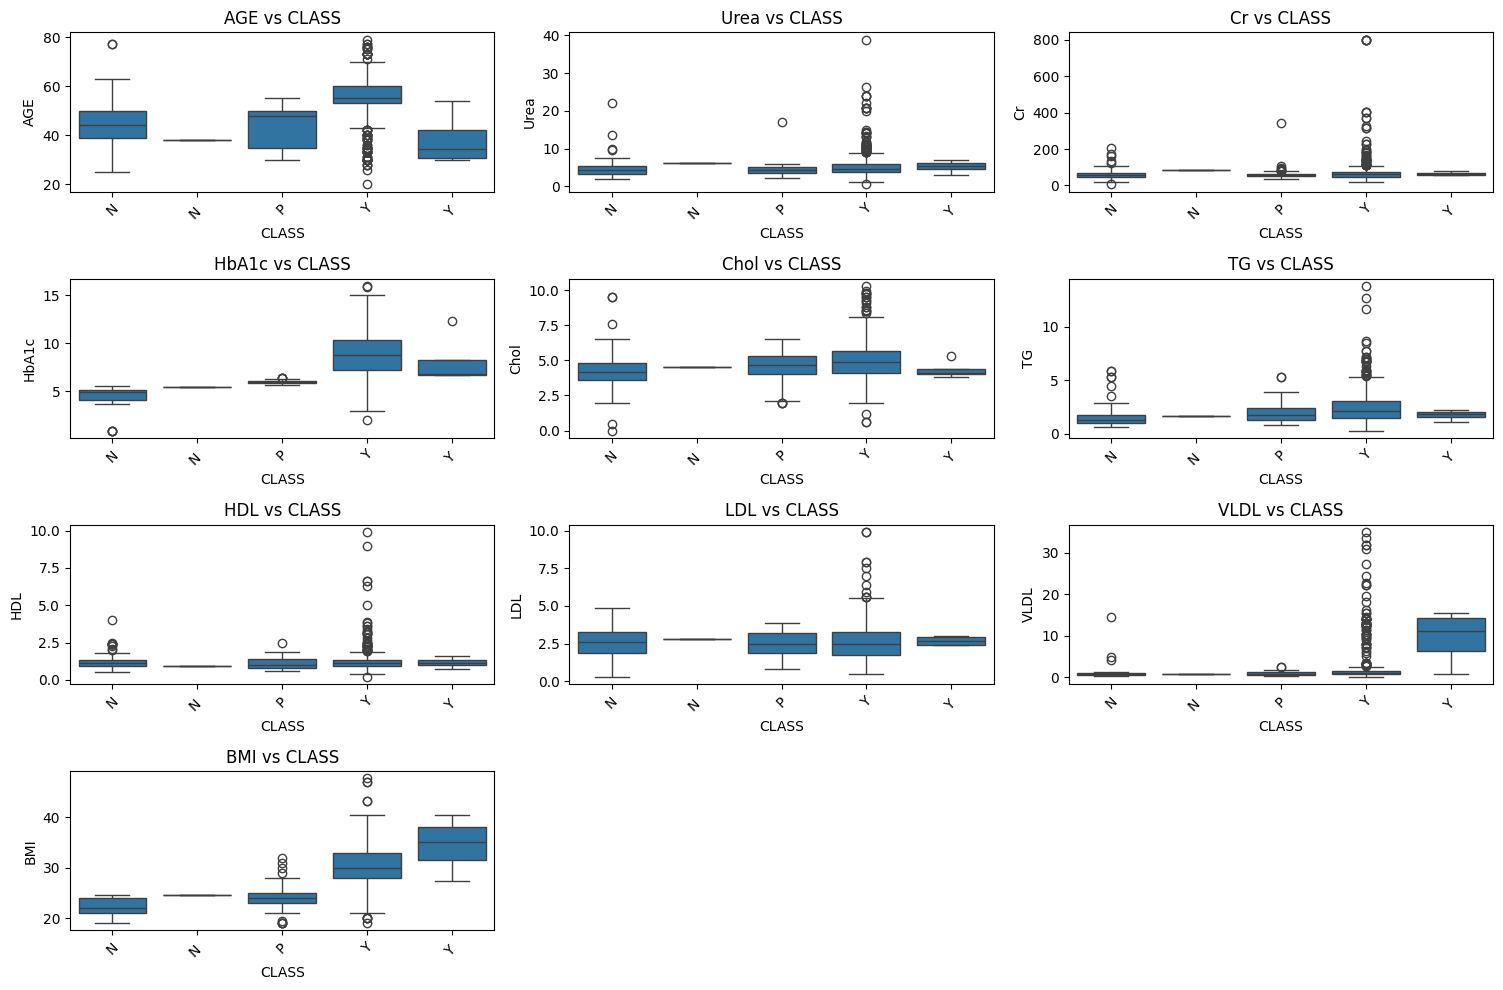

In [41]:
# 7. Hubungan Fitur dengan Kelas Target
# Fitur Numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='CLASS', y=col, data=df)
    plt.title(f'{col} vs CLASS')
    plt.xticks(rotation=45)
    print(f'\n### Statistik Deskriptif {col} per Kelas ###')
    for cls in df['CLASS'].unique():
        class_data = df[df['CLASS'] == cls][col].dropna()
        print(f'Kelas {cls}:')
        print(f'  Mean: {class_data.mean():.2f}')
        print(f'  Median: {class_data.median():.2f}')
        print(f'  Standar Deviasi: {class_data.std():.2f}')
plt.tight_layout()
plt.show()

In [42]:
# 8. Uji Statistik untuk Signifikansi Fitur Numerik
# Tujuan: Mengevaluasi apakah fitur numerik memiliki perbedaan signifikan antar kelas.
print('\n### Uji ANOVA untuk Fitur Numerik ###')
for col in numerical_cols:
    formula = f'{col} ~ C(CLASS)'
    model = ols(formula, data=df).fit()
    anova_table = anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'].iloc[0]

    if p_value < 0.05:
        interpretation = '=> Perbedaan signifikan antar kelas.'
    else:
        interpretation = '=> Tidak ada perbedaan signifikan antar kelas.'

    print(f'{col}: p-value = {p_value:.4f} {interpretation}')


### Uji ANOVA untuk Fitur Numerik ###
AGE: p-value = 0.0000 => Perbedaan signifikan antar kelas.
Urea: p-value = 0.2185 => Tidak ada perbedaan signifikan antar kelas.
Cr: p-value = 0.8217 => Tidak ada perbedaan signifikan antar kelas.
HbA1c: p-value = 0.0000 => Perbedaan signifikan antar kelas.
Chol: p-value = 0.0000 => Perbedaan signifikan antar kelas.
TG: p-value = 0.0000 => Perbedaan signifikan antar kelas.
HDL: p-value = 0.8894 => Tidak ada perbedaan signifikan antar kelas.
LDL: p-value = 0.9571 => Tidak ada perbedaan signifikan antar kelas.
VLDL: p-value = 0.0000 => Perbedaan signifikan antar kelas.
BMI: p-value = 0.0000 => Perbedaan signifikan antar kelas.


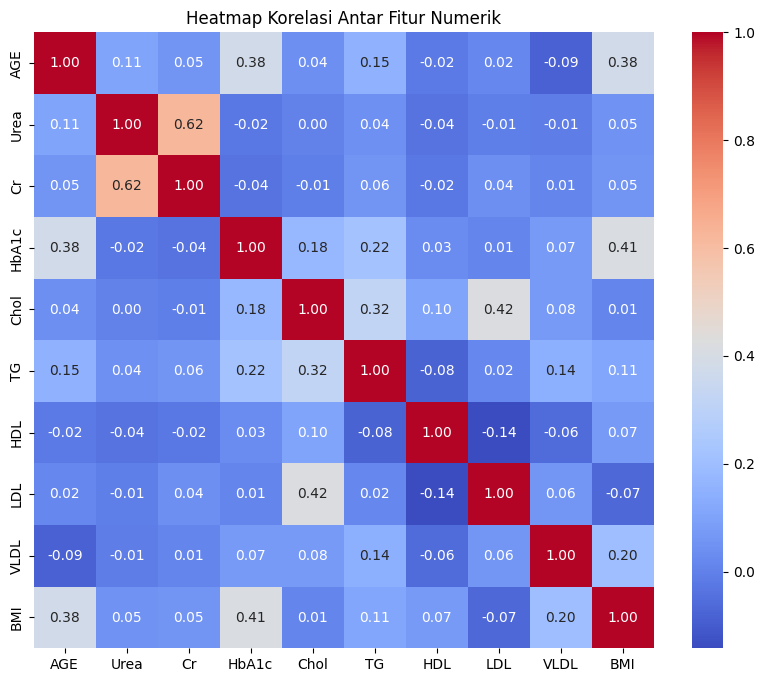


### Statistik Deskriptif Korelasi ###
Korelasi tertinggi (selain 1):
Urea   Cr      0.624134
Cr     Urea    0.624134
LDL    Chol    0.416665
Chol   LDL     0.416665
HbA1c  BMI     0.413350
dtype: float64
Korelasi terendah:
LDL   HDL    -0.142079
HDL   LDL    -0.142079
VLDL  AGE    -0.087903
AGE   VLDL   -0.087903
TG    HDL    -0.083001
dtype: float64


In [43]:
# 9. Korelasi Antar Fitur Numerik
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()
print('\n### Statistik Deskriptif Korelasi ###')
max_corr = correlation_matrix.unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1].head(5)
print('Korelasi tertinggi (selain 1):')
print(max_corr)
min_corr = correlation_matrix.unstack().sort_values().head(5)
print('Korelasi terendah:')
print(min_corr)

# Preprocessing untuk Dataset Diabetes

## Pendahuluan
Preprocessing ini merupakan kelanjutan dari Exploratory Data Analysis (EDA) untuk mempersiapkan dataset diabetes agar siap digunakan pada model **Naive Bayes** dan **Decision Tree**. EDA mengidentifikasi inkonsistensi label, outlier (misalnya 9.8% pada AGE), distribusi tidak normal (skewness tinggi pada TG, HDL, dll.), ketidakseimbangan kelas (rasio 0.063), dan korelasi tinggi (Cr-Urea 0.624). Preprocessing ini bertujuan untuk menangani masalah tersebut dengan verifikasi mendalam.

## Langkah-langkah Preprocessing
Langkah-langkah ini dirancang untuk memenuhi kebutuhan model:
- **Naive Bayes**: Memerlukan distribusi normal, independensi fitur, dan kelas seimbang.
- **Decision Tree**: Memerlukan penanganan outlier dan ketidakseimbangan kelas.

1. Standarisasi label untuk `Gender` dan `CLASS`.
2. Encoding fitur kategorikal `Gender`.
3. Seleksi fitur berdasarkan uji ANOVA.
4. Penanganan outlier dengan Winsorization yang disesuaikan.
5. Transformasi data dengan verifikasi distribusi.
6. Penanganan ketidakseimbangan kelas menggunakan SMOTE.
7. (Opsional) Normalisasi fitur numerik.
8. Verifikasi korelasi pasca-preprocessing.

In [44]:
# Import library yang diperlukan
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy import stats

In [45]:
# Simpan data asli untuk perbandingan
df_original = df.copy()

In [46]:
# 1. Standarisasi Label
# Tujuan: Mengatasi inkonsistensi penulisan.
print('\n### Standarisasi Label ###')
df['Gender'] = df['Gender'].replace({'f': 'F'})
df['CLASS'] = df['CLASS'].replace({'y': 'Y', 'n': 'N', 'Y ': 'Y', 'N ': 'N'})
print('Distribusi Gender sebelum:', df_original['Gender'].value_counts())
print('Distribusi Gender setelah:', df['Gender'].value_counts())
print('Distribusi CLASS sebelum:', df_original['CLASS'].value_counts())
print('Distribusi CLASS setelah:', df['CLASS'].value_counts())


### Standarisasi Label ###
Distribusi Gender sebelum: Gender
M    565
F    434
f      1
Name: count, dtype: int64
Distribusi Gender setelah: Gender
M    565
F    435
Name: count, dtype: int64
Distribusi CLASS sebelum: CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64
Distribusi CLASS setelah: CLASS
Y    844
N    103
P     53
Name: count, dtype: int64


In [47]:
# 2. Encoding Fitur Kategorikal (Gender)
# Tujuan: Mengubah Gender (M/F) menjadi numerik untuk modeling.
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
print('\n### Encoding Gender ###')
print('Gender diencode (M=1, F=0):', df['Gender'].value_counts())


### Encoding Gender ###
Gender diencode (M=1, F=0): Gender
1    565
0    435
Name: count, dtype: int64


In [48]:
# 3. Seleksi Fitur
# Tujuan: Menghapus fitur tidak signifikan (Urea, Cr) berdasarkan uji ANOVA (p-value > 0.05).
numerical_cols = ['AGE', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']  # Urea dan Cr dihapus
print('\n### Seleksi Fitur ###')
print('Fitur yang dihapus (p-value > 0.05 atau Tidak Signifikan): Urea, Cr')
print('Fitur numerik yang digunakan:', numerical_cols)


### Seleksi Fitur ###
Fitur yang dihapus (p-value > 0.05 atau Tidak Signifikan): Urea, Cr
Fitur numerik yang digunakan: ['AGE', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']



Outlier pada AGE telah di-Winsorize (Batas Bawah: 33.00, Batas Atas: 66.00)
Rerata sebelum: 53.53, sesudah: 53.43
Standar Deviasi sebelum: 8.80, sesudah: 8.01

Outlier pada VLDL telah di-Winsorize (Batas Bawah: 0.40, Batas Atas: 8.10)
Rerata sebelum: 1.85, sesudah: 1.47
Standar Deviasi sebelum: 3.66, sesudah: 1.72

Outlier pada TG telah di-Winsorize (Batas Bawah: 0.80, Batas Atas: 5.10)
Rerata sebelum: 2.35, sesudah: 2.29
Standar Deviasi sebelum: 1.40, sesudah: 1.15

Outlier pada HDL telah di-Winsorize (Batas Bawah: 0.70, Batas Atas: 1.90)
Rerata sebelum: 1.20, sesudah: 1.15
Standar Deviasi sebelum: 0.66, sesudah: 0.34


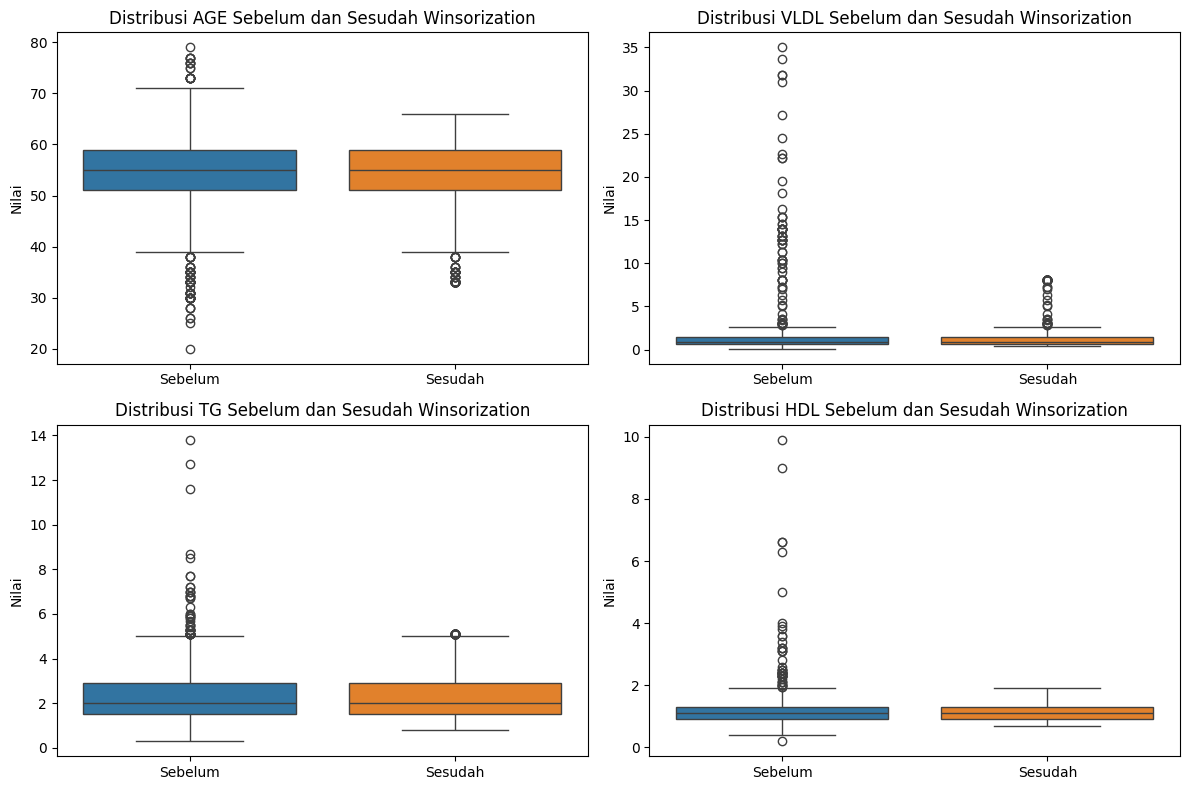

In [49]:
# 4. Penanganan Outlier dengan Winsorization
# Tujuan: Mengurangi outlier dengan batas disesuaikan untuk Decision Tree.
def winsorize(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df, lower_bound, upper_bound

outlier_cols = ['AGE', 'VLDL', 'TG', 'HDL']  # Fitur dengan outlier > 5%
for col in outlier_cols:
    df, lower_bound, upper_bound = winsorize(df, col)  # Perbaikan: Kembalikan df
    print(f'\nOutlier pada {col} telah di-Winsorize (Batas Bawah: {lower_bound:.2f}, Batas Atas: {upper_bound:.2f})')
    print(f'Rerata sebelum: {df_original[col].mean():.2f}, sesudah: {df[col].mean():.2f}')
    print(f'Standar Deviasi sebelum: {df_original[col].std():.2f}, sesudah: {df[col].std():.2f}')

# Visualisasi Boxplot sebelum dan sesudah
plt.figure(figsize=(12, 8))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 2, i)
    data_to_plot = pd.DataFrame({
        'Sebelum': df_original[col],
        'Sesudah': df[col]
    })
    sns.boxplot(data=data_to_plot, orient='v')
    plt.title(f'Distribusi {col} Sebelum dan Sesudah Winsorization')
    plt.ylabel('Nilai')
plt.tight_layout()
plt.show()


### Transformasi Data ###
Fitur yang ditransformasi: ['TG', 'HDL', 'VLDL']

### Statistik Sebelum Transformasi TG ###
Mean: 2.35
Skewness: 2.30
Kurtosis: 10.26

### Statistik Sebelum Transformasi HDL ###
Mean: 1.20
Skewness: 6.28
Kurtosis: 62.63

### Statistik Sebelum Transformasi VLDL ###
Mean: 1.85
Skewness: 5.35
Kurtosis: 33.51

### Statistik Sesudah Transformasi TG ###
Mean: 0.00
Skewness: 0.04
Kurtosis: -0.71

### Statistik Sesudah Transformasi HDL ###
Mean: -0.00
Skewness: 0.07
Kurtosis: -0.81

### Statistik Sesudah Transformasi VLDL ###
Mean: 0.00
Skewness: 0.17
Kurtosis: -0.34


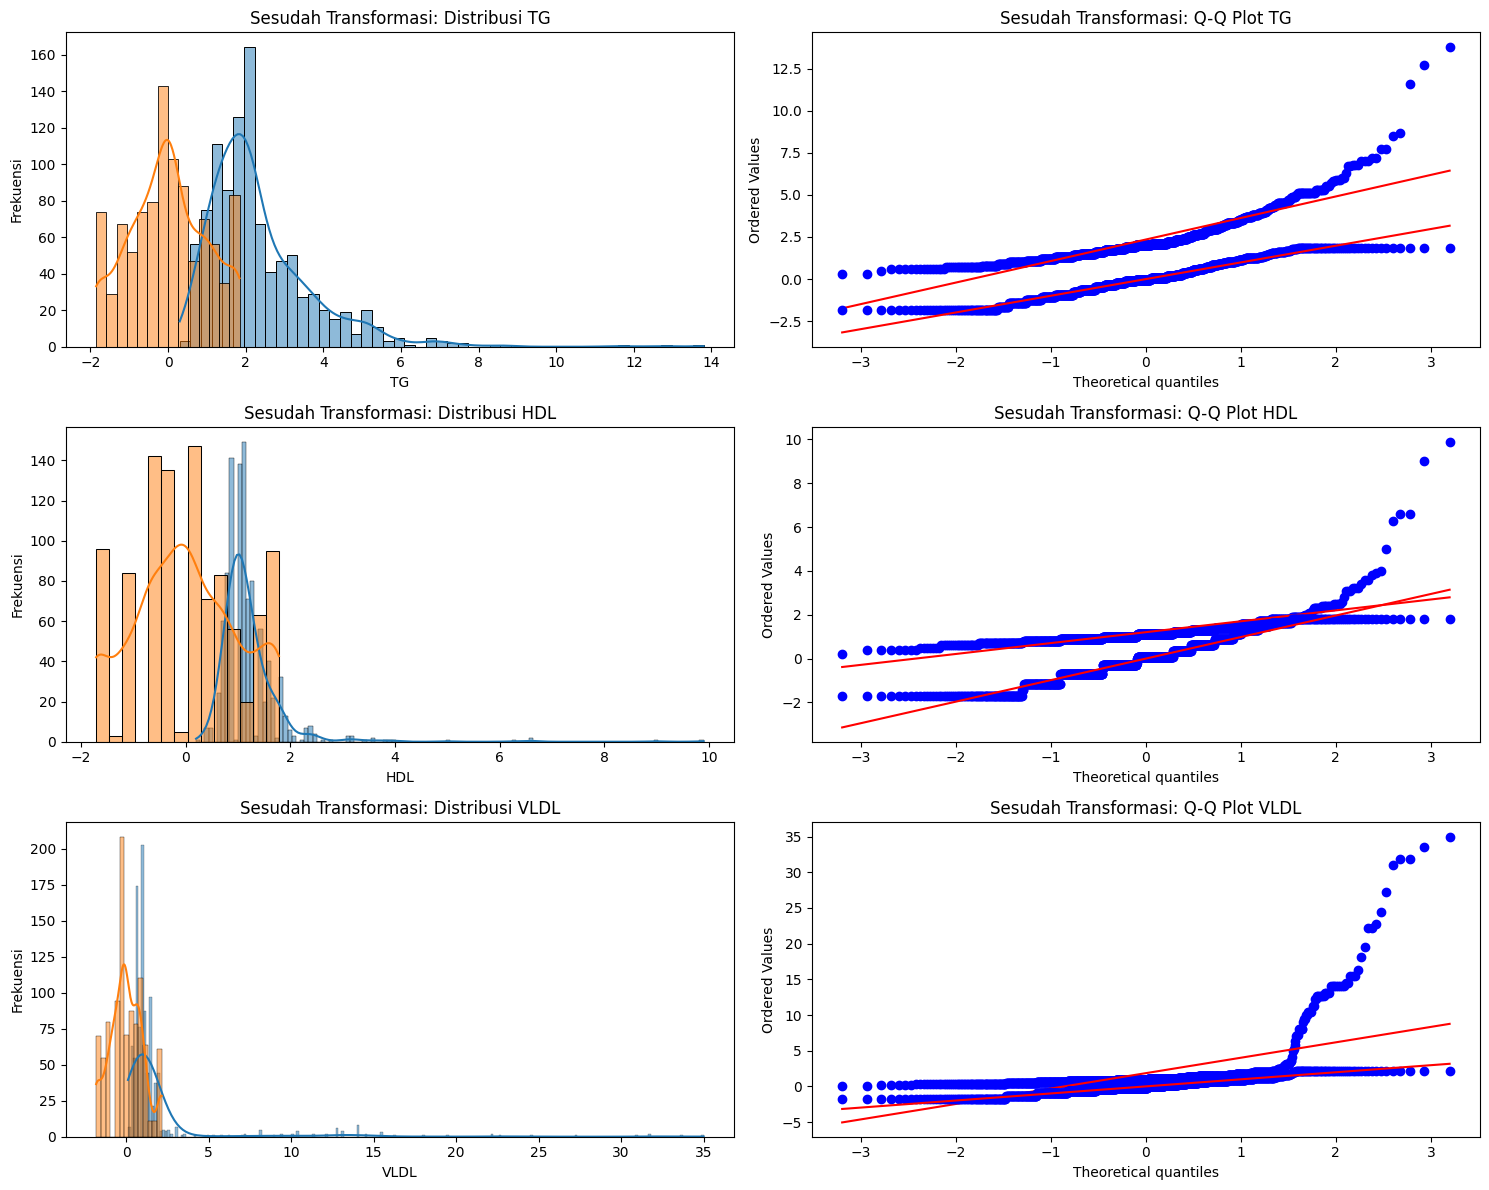

In [50]:
# 5. Transformasi Data dan Verifikasi Distribusi
# Tujuan: Mendekati distribusi normal dengan verifikasi untuk Naive Bayes.
pt = PowerTransformer(method='yeo-johnson')
cols_to_transform = ['TG', 'HDL', 'VLDL']  # LDL dihapus karena skewness lebih rendah
print('\n### Transformasi Data ###')
print('Fitur yang ditransformasi:', cols_to_transform)

# Visualisasi dan statistik sebelum transformasi
plt.figure(figsize=(15, 12))
for i, col in enumerate(cols_to_transform, 1):
    plt.subplot(3, 2, 2*i-1)
    sns.histplot(df_original[col], kde=True)
    plt.title(f'Sebelum Transformasi: Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.subplot(3, 2, 2*i)
    stats.probplot(df_original[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Sebelum Transformasi: Q-Q Plot {col}')
    print(f'\n### Statistik Sebelum Transformasi {col} ###')
    print(f'Mean: {df_original[col].mean():.2f}')
    print(f'Skewness: {df_original[col].skew():.2f}')
    print(f'Kurtosis: {df_original[col].kurtosis():.2f}')

# Terapkan transformasi
df[cols_to_transform] = pt.fit_transform(df[cols_to_transform])

# Visualisasi dan statistik setelah transformasi
for i, col in enumerate(cols_to_transform, 1):
    plt.subplot(3, 2, 2*i-1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Sesudah Transformasi: Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.subplot(3, 2, 2*i)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Sesudah Transformasi: Q-Q Plot {col}')
    print(f'\n### Statistik Sesudah Transformasi {col} ###')
    print(f'Mean: {df[col].mean():.2f}')
    print(f'Skewness: {df[col].skew():.2f}')
    print(f'Kurtosis: {df[col].kurtosis():.2f}')
plt.tight_layout()
plt.show()


### Penanganan Ketidakseimbangan Kelas ###
Jumlah sampel sebelum SMOTE: 1000, setelah SMOTE: 2532
Distribusi kelas sebelum SMOTE:
CLASS
Y    844
N    103
P     53
Name: count, dtype: int64
Distribusi kelas setelah SMOTE:
CLASS
N    844
P    844
Y    844
Name: count, dtype: int64


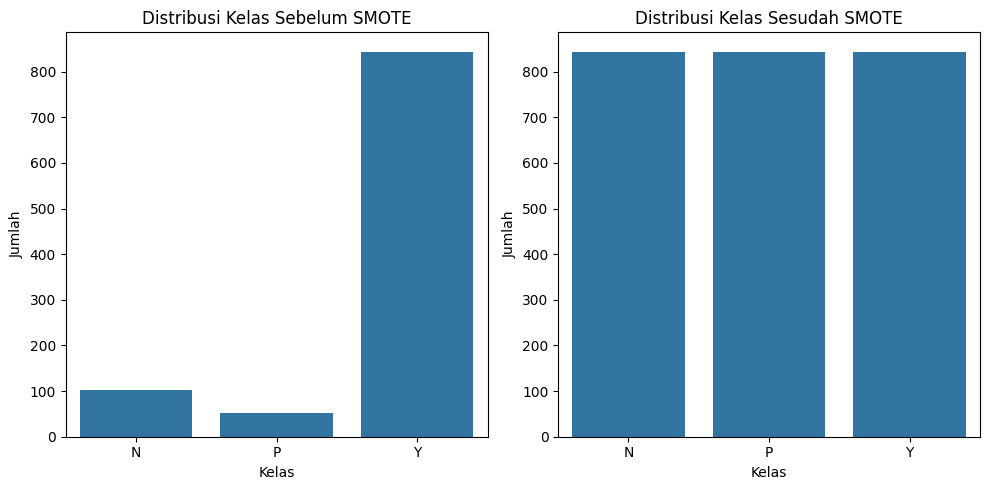

In [51]:
# 6. Penanganan Ketidakseimbangan Kelas
# Tujuan: Menyeimbangkan kelas untuk kedua model.
X = df[numerical_cols + ['Gender']]
y = df['CLASS']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print(f'\n### Penanganan Ketidakseimbangan Kelas ###')
print(f'Jumlah sampel sebelum SMOTE: {len(X)}, setelah SMOTE: {len(X_res)}')
print(f'Distribusi kelas sebelum SMOTE:\n{y.value_counts()}')
print(f'Distribusi kelas setelah SMOTE:\n{y_res.value_counts()}')

# Visualisasi distribusi kelas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=df['CLASS'])
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.subplot(1, 2, 2)
sns.countplot(x=y_res)
plt.title('Distribusi Kelas Sesudah SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

In [52]:
# 7. (Opsional) Normalisasi Fitur Numerik
# Tujuan: Memastikan skala seragam (meskipun tidak wajib untuk Decision Tree).
scaler = StandardScaler()
X_res[numerical_cols] = scaler.fit_transform(X_res[numerical_cols])
print('\n### Normalisasi Fitur Numerik ###')
print('Statistik deskriptif setelah normalisasi:')
print(X_res[numerical_cols].describe())


### Normalisasi Fitur Numerik ###
Statistik deskriptif setelah normalisasi:
                AGE         HbA1c          Chol           TG           HDL  \
count  2.532000e+03  2.532000e+03  2.532000e+03  2532.000000  2.532000e+03   
mean   2.245001e-16 -8.980003e-17 -8.194253e-16     0.000000  1.964376e-17   
std    1.000198e+00  1.000198e+00  1.000198e+00     1.000198  1.000198e+00   
min   -1.594455e+00 -2.419188e+00 -4.231189e+00    -1.774668 -1.876222e+00   
25%   -8.288956e-01 -6.358220e-01 -5.403372e-01    -0.746388 -7.908772e-01   
50%    2.335876e-01 -2.008547e-01 -9.296629e-02    -0.136447  2.765687e-02   
75%    8.115885e-01  3.211060e-01  5.669183e-01     0.575619  7.111062e-01   
max    2.014610e+00  4.148818e+00  5.272754e+00     2.302716  1.902991e+00   

                LDL          VLDL           BMI  
count  2.532000e+03  2.532000e+03  2.532000e+03  
mean   2.637876e-16 -1.122500e-17 -6.735002e-16  
std    1.000198e+00  1.000198e+00  1.000198e+00  
min   -2.495767e+00 

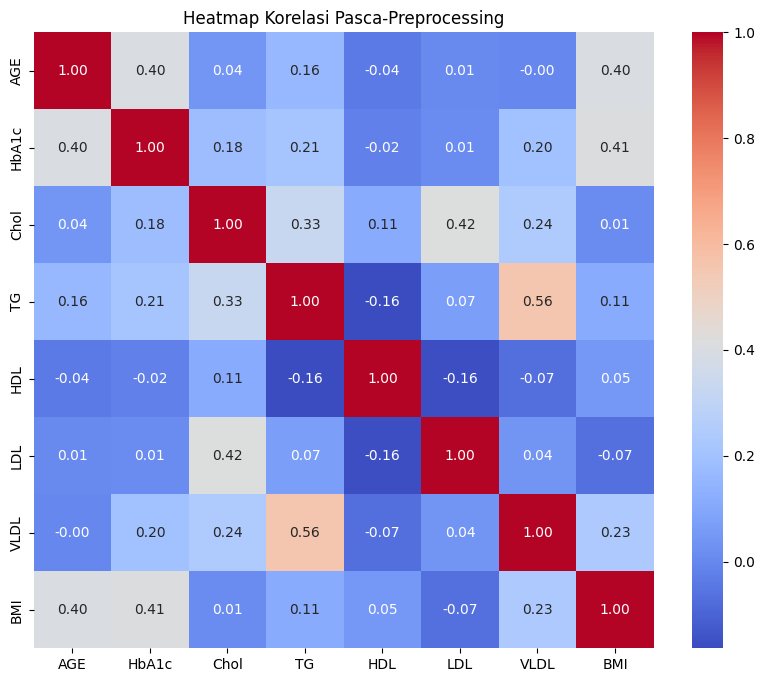


### Statistik Korelasi Pasca-Preprocessing ###
Korelasi tertinggi (selain 1):
TG     VLDL    0.557343
VLDL   TG      0.557343
Chol   LDL     0.416665
LDL    Chol    0.416665
HbA1c  BMI     0.413350
dtype: float64


In [53]:
# 8. Verifikasi Korelasi Pasca-Preprocessing
# Tujuan: Memastikan independensi fitur untuk Naive Bayes.
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Pasca-Preprocessing')
plt.show()
print('\n### Statistik Korelasi Pasca-Preprocessing ###')
max_corr = correlation_matrix.unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1].head(5)
print('Korelasi tertinggi (selain 1):')
print(max_corr)

In [54]:
# Menggabungkan X_res dan y_res menjadi satu DataFrame
X_res_df = pd.DataFrame(X_res, columns=numerical_cols + ['Gender'])
y_res_df = pd.DataFrame(y_res, columns=['CLASS'])
processed_dataset = pd.concat([X_res_df, y_res_df], axis=1)

# Menyimpan dataset yang telah diproses ke dalam file CSV
processed_dataset.to_csv('diabetes_processed.csv', index=False)
print('\n### Penyimpanan Dataset ###')
print('Dataset yang telah diproses telah disimpan sebagai "diabetes_processed.csv"')

# Menampilkan 5 baris pertama dataset yang disimpan sebagai konfirmasi
print('\n### 5 Baris Pertama Dataset yang Disimpan ###')
print(processed_dataset.head())


### Penyimpanan Dataset ###
Dataset yang telah diproses telah disimpan sebagai "diabetes_processed.csv"

### 5 Baris Pertama Dataset yang Disimpan ###
        AGE     HbA1c      Chol        TG       HDL       LDL      VLDL  \
0  0.264760 -0.679319 -0.355795 -1.536971  1.902991 -1.286597 -1.245716   
1 -1.594455 -0.679319 -0.817151 -0.580268  0.027657 -0.517125 -0.807627   
2  0.264760 -0.679319 -0.355795 -1.536971  1.902991 -1.286597 -1.245716   
3  0.264760 -0.679319 -0.355795 -1.536971  1.902991 -1.286597 -1.245716   
4 -1.594455 -0.679319  0.290104 -1.317297 -1.293346 -0.627050 -1.769525   

        BMI  Gender CLASS  
0 -0.375277       0     N  
1 -0.589293       1     N  
2 -0.375277       0     N  
3 -0.375277       0     N  
4 -1.017326       1     N  


# Modeling dan Evaluasi untuk Dataset Diabetes

1. Modeling dengan Naive Bayes dan Decision Tree.
2. Evaluasi dengan metrik lengkap, cross-validation, analisis kesalahan, dan feature importance.
3. Visualisasi performa dan distribusi fitur per kelas.

In [55]:
# Import library yang diperlukan
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelBinarizer

In [56]:
# Memuat dataset yang telah diproses
df = pd.read_csv('diabetes_processed.csv')

In [57]:
# 1. Persiapan Data untuk Modeling
X = df[['AGE', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'Gender']]
y = df['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# 2. Modeling dengan Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)

In [59]:
# 3. Modeling dengan Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)

In [60]:
# 4. Cross-Validation
nb_cv_scores = cross_val_score(nb_model, X, y, cv=5, scoring='f1_macro')
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='f1_macro')
print('\n### Cross-Validation Scores ###')
print(f'Naive Bayes F1-Score (Macro) CV: Mean={nb_cv_scores.mean():.4f}, Std={nb_cv_scores.std():.4f}')
print(f'Decision Tree F1-Score (Macro) CV: Mean={dt_cv_scores.mean():.4f}, Std={dt_cv_scores.std():.4f}')


### Cross-Validation Scores ###
Naive Bayes F1-Score (Macro) CV: Mean=0.9561, Std=0.0282
Decision Tree F1-Score (Macro) CV: Mean=0.9849, Std=0.0263



### Evaluasi Naive Bayes ###
Akurasi: 0.9665
Precision (Macro): 0.9682
Recall (Macro): 0.9657
F1-Score (Macro): 0.9666
ROC-AUC (Macro, OvR): 0.9973

Metrik Per Kelas:
N: Precision=0.9399, Recall=0.9718, F1=0.9556
P: Precision=0.9933, Recall=0.9427, F1=0.9673
Y: Precision=0.9714, Recall=0.9827, F1=0.9770

Classification Report:
              precision    recall  f1-score   support

           N       0.94      0.97      0.96       177
           P       0.99      0.94      0.97       157
           Y       0.97      0.98      0.98       173

    accuracy                           0.97       507
   macro avg       0.97      0.97      0.97       507
weighted avg       0.97      0.97      0.97       507



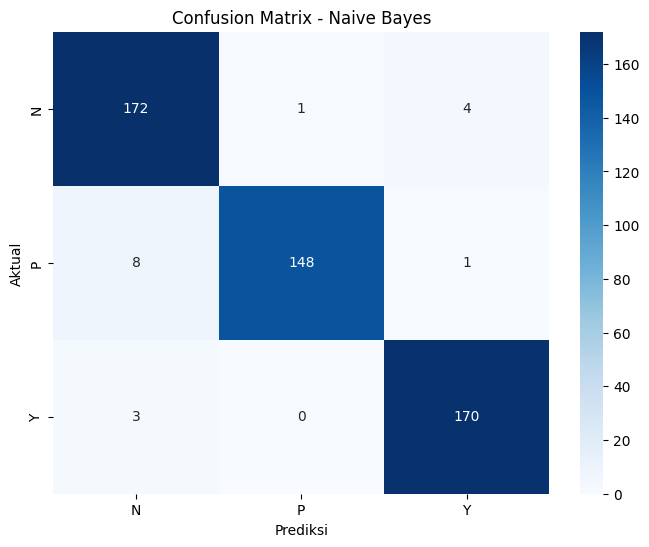


Jumlah data yang salah diklasifikasikan: 17
Contoh 5 data yang salah diklasifikasikan (posisi, aktual, prediksi):
Posisi 13: Aktual=N, Prediksi=Y
Posisi 66: Aktual=Y, Prediksi=N
Posisi 112: Aktual=P, Prediksi=N
Posisi 147: Aktual=Y, Prediksi=N
Posisi 150: Aktual=P, Prediksi=N

### Evaluasi Decision Tree ###
Akurasi: 0.9980
Precision (Macro): 0.9981
Recall (Macro): 0.9981
F1-Score (Macro): 0.9981
ROC-AUC (Macro, OvR): 0.9986

Metrik Per Kelas:
N: Precision=1.0000, Recall=0.9944, F1=0.9972
P: Precision=1.0000, Recall=1.0000, F1=1.0000
Y: Precision=0.9943, Recall=1.0000, F1=0.9971

Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.99      1.00       177
           P       1.00      1.00      1.00       157
           Y       0.99      1.00      1.00       173

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507



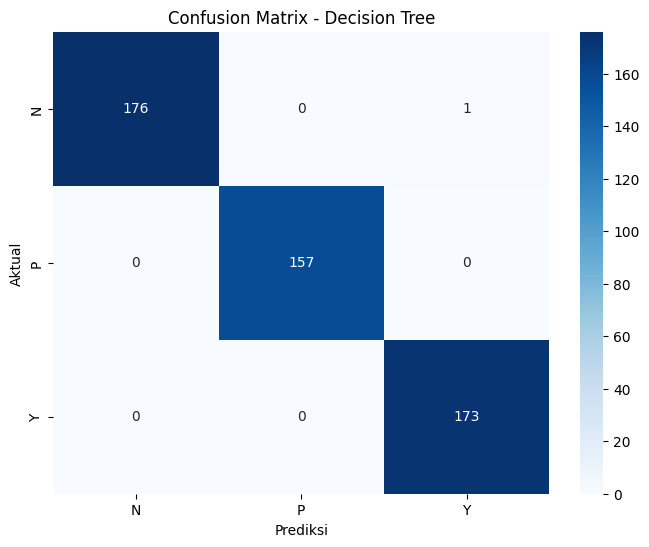


Jumlah data yang salah diklasifikasikan: 1
Contoh 5 data yang salah diklasifikasikan (posisi, aktual, prediksi):
Posisi 224: Aktual=N, Prediksi=Y

Feature Importance:
  Feature  Importance
1   HbA1c    0.898735
7     BMI    0.040144
0     AGE    0.034856
3      TG    0.015010
2    Chol    0.006852
6    VLDL    0.002762
4     HDL    0.001641
5     LDL    0.000000
8  Gender    0.000000


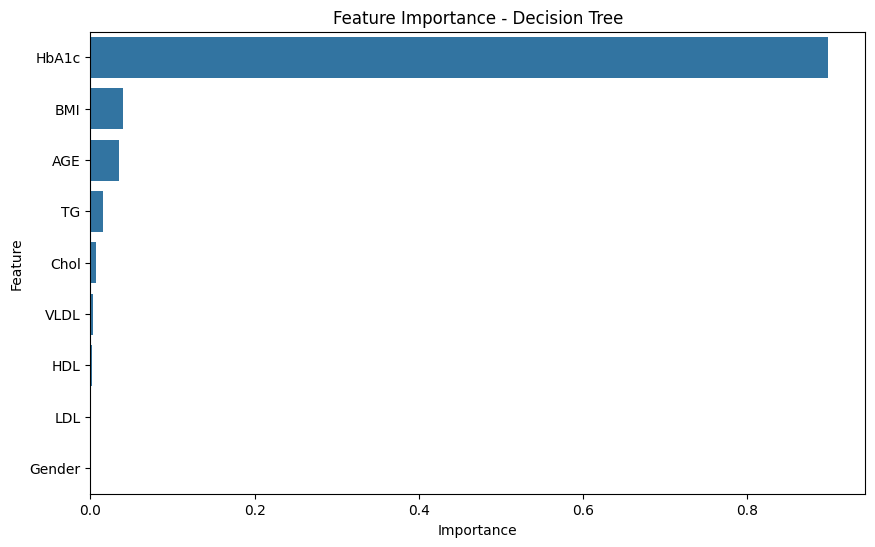

In [61]:
# 5. Evaluasi Model
def evaluate_model(y_true, y_pred, y_prob, model_name, model=None):
    acc = accuracy_score(y_true, y_pred)
    prec_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
    prec_per_class = precision_score(y_true, y_pred, average=None, zero_division=0)
    rec_per_class = recall_score(y_true, y_pred, average=None, zero_division=0)
    f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0)

    # ROC-AUC untuk multiclass (one-vs-rest)
    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_true)
    roc_auc = roc_auc_score(y_true_bin, y_prob, average='macro', multi_class='ovr')

    cm = confusion_matrix(y_true, y_pred)
    print(f'\n### Evaluasi {model_name} ###')
    print(f'Akurasi: {acc:.4f}')
    print(f'Precision (Macro): {prec_macro:.4f}')
    print(f'Recall (Macro): {rec_macro:.4f}')
    print(f'F1-Score (Macro): {f1_macro:.4f}')
    print(f'ROC-AUC (Macro, OvR): {roc_auc:.4f}')
    print('\nMetrik Per Kelas:')
    for i, label in enumerate(['N', 'P', 'Y']):
        print(f'{label}: Precision={prec_per_class[i]:.4f}, Recall={rec_per_class[i]:.4f}, F1={f1_per_class[i]:.4f}')
    print('\nClassification Report:')
    print(classification_report(y_true, y_pred, zero_division=0))

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'P', 'Y'], yticklabels=['N', 'P', 'Y'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

    # Analisis Kesalahan
    errors = y_true != y_pred
    error_positions = np.where(errors)[0]  # Mendapatkan posisi (bukan indeks asli)
    print(f'\nJumlah data yang salah diklasifikasikan: {len(error_positions)}')
    if len(error_positions) > 0:
        print('Contoh 5 data yang salah diklasifikasikan (posisi, aktual, prediksi):')
        for pos in error_positions[:5]:
            print(f'Posisi {pos}: Aktual={y_true.iloc[pos]}, Prediksi={y_pred[pos]}')

    # Feature Importance (khusus Decision Tree)
    if model_name == 'Decision Tree':
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print('\nFeature Importance:')
        print(feature_importance)
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title('Feature Importance - Decision Tree')
        plt.show()

    return acc, prec_macro, rec_macro, f1_macro, roc_auc

# Evaluasi Naive Bayes
nb_metrics = evaluate_model(y_test, y_pred_nb, y_prob_nb, 'Naive Bayes')

# Evaluasi Decision Tree
dt_metrics = evaluate_model(y_test, y_pred_dt, y_prob_dt, 'Decision Tree', dt_model)

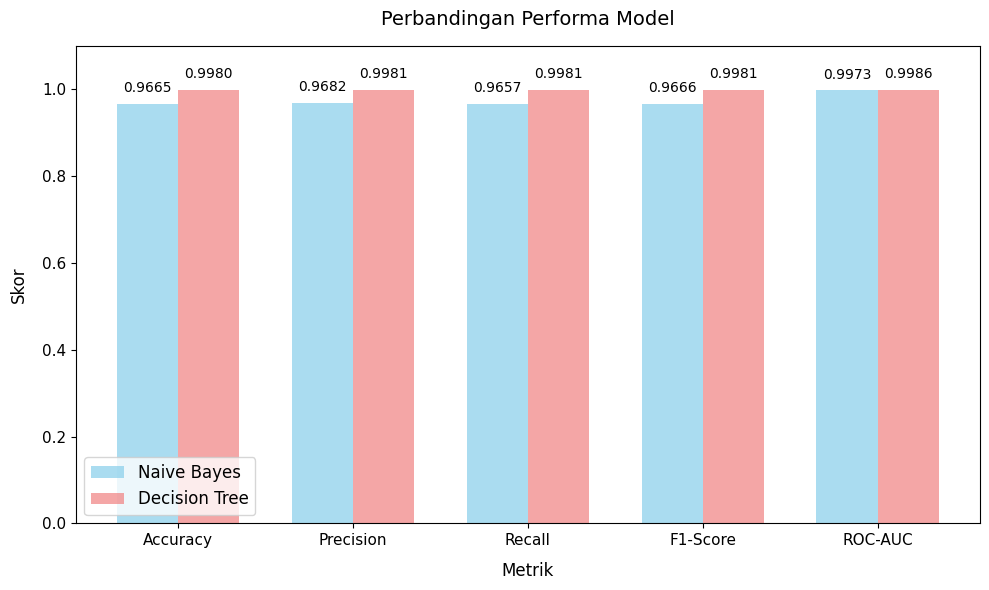

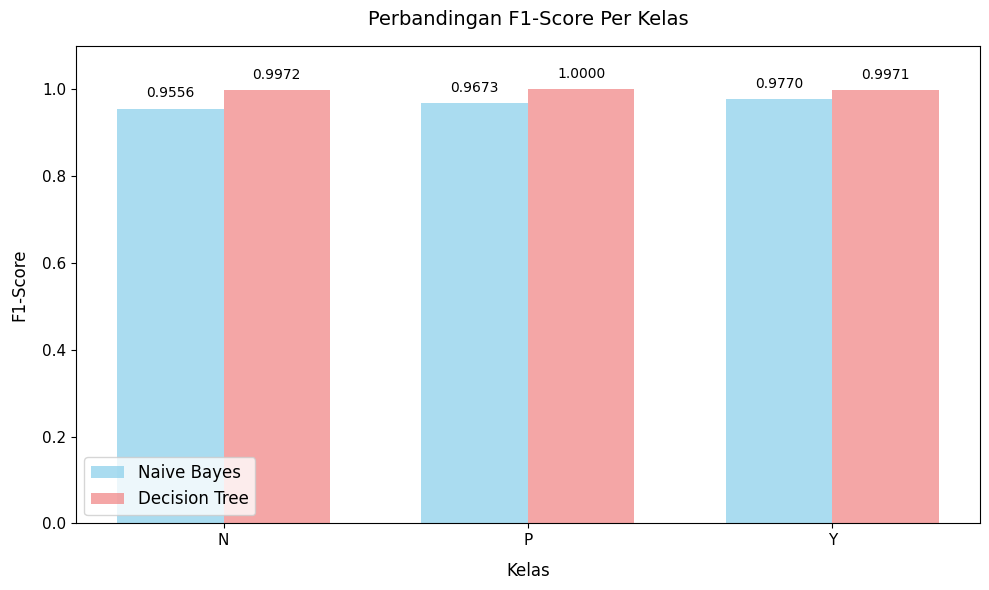

In [62]:
# 6. Visualisasi Perbandingan Performa
# Tujuan: Membandingkan performa model dengan visualisasi yang lebih rapi dan mudah dibaca.

# Data metrik keseluruhan
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
nb_scores = list(nb_metrics)
dt_scores = list(dt_metrics)

# Plot perbandingan metrik keseluruhan
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metrics))

# Membuat bar plot
bars_nb = plt.bar(index, nb_scores, bar_width, label='Naive Bayes', alpha=0.7, color='skyblue')
bars_dt = plt.bar(index + bar_width, dt_scores, bar_width, label='Decision Tree', alpha=0.7, color='lightcoral')

plt.xlabel('Metrik', fontsize=12, labelpad=10)
plt.ylabel('Skor', fontsize=12, labelpad=10)
plt.title('Perbandingan Performa Model', fontsize=14, pad=15)
plt.xticks(index + bar_width / 2, metrics, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12)

plt.ylim(0, 1.1)

for i, (nb, dt) in enumerate(zip(nb_scores, dt_scores)):
    plt.text(i, nb + 0.02, f'{nb:.4f}', ha='center', va='bottom', fontsize=10, color='black')
    plt.text(i + bar_width, dt + 0.02, f'{dt:.4f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Plot perbandingan F1-Score per kelas
nb_f1_per_class = f1_score(y_test, y_pred_nb, average=None, zero_division=0)
dt_f1_per_class = f1_score(y_test, y_pred_dt, average=None, zero_division=0)
classes = ['N', 'P', 'Y']

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(classes))

# Membuat bar plot
bars_nb = plt.bar(index, nb_f1_per_class, bar_width, label='Naive Bayes', alpha=0.7, color='skyblue')
bars_dt = plt.bar(index + bar_width, dt_f1_per_class, bar_width, label='Decision Tree', alpha=0.7, color='lightcoral')

plt.xlabel('Kelas', fontsize=12, labelpad=10)
plt.ylabel('F1-Score', fontsize=12, labelpad=10)
plt.title('Perbandingan F1-Score Per Kelas', fontsize=14, pad=15)
plt.xticks(index + bar_width / 2, classes, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12)

plt.ylim(0, 1.1)

for i, (nb, dt) in enumerate(zip(nb_f1_per_class, dt_f1_per_class)):
    plt.text(i, nb + 0.02, f'{nb:.4f}', ha='center', va='bottom', fontsize=10, color='black')
    plt.text(i + bar_width, dt + 0.02, f'{dt:.4f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [63]:
# 7. Tabel Perbandingan Ringkas
comparison_df = pd.DataFrame({
    'Metrik': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)', 'ROC-AUC (Macro, OvR)'],
    'Naive Bayes': [f'{nb:.4f}' for nb in nb_scores],
    'Decision Tree': [f'{dt:.4f}' for dt in dt_scores]
})
print('\n### Tabel Perbandingan Performa ###')
print(comparison_df)


### Tabel Perbandingan Performa ###
                 Metrik Naive Bayes Decision Tree
0              Accuracy      0.9665        0.9980
1     Precision (Macro)      0.9682        0.9981
2        Recall (Macro)      0.9657        0.9981
3      F1-Score (Macro)      0.9666        0.9981
4  ROC-AUC (Macro, OvR)      0.9973        0.9986


# Evaluasi Overfitting dan Visualisasi Tambahan untuk Dataset Diabetes

## Evaluasi Overfitting:
1. Membandingkan akurasi dan F1-Score pada data latih dan data uji.
2. Menggunakan hasil cross-validation sebelumnya untuk melihat stabilitas performa.
3. Membuat learning curve untuk memvisualisasikan performa model seiring bertambahnya ukuran data.

## Visualisasi ROC-AUC:
1. Membuat kurva ROC untuk setiap kelas (N, P, Y) menggunakan pendekatan OvR.

## Wawasan Overfitting:
1. Menganalisis hasil evaluasi untuk menentukan apakah model overfitting, underfitting, atau optimal.

In [64]:
# Memuat dataset yang telah diproses
df = pd.read_csv('diabetes_processed.csv')

# Persiapan data
X = df[['AGE', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'Gender']]
y = df['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling (menggunakan model yang sama seperti sebelumnya)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb_train = nb_model.predict(X_train)
y_pred_nb_test = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt_train = dt_model.predict(X_train)
y_pred_dt_test = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)


### Evaluasi Overfitting - Naive Bayes ###
Akurasi Train: 0.9541, Akurasi Test: 0.9665, Selisih: -0.0124
F1-Score (Macro) Train: 0.9541, F1-Score (Macro) Test: 0.9666, Selisih: -0.0125
Status Model: Optimal (Selisih performa kecil dan performa test memadai)


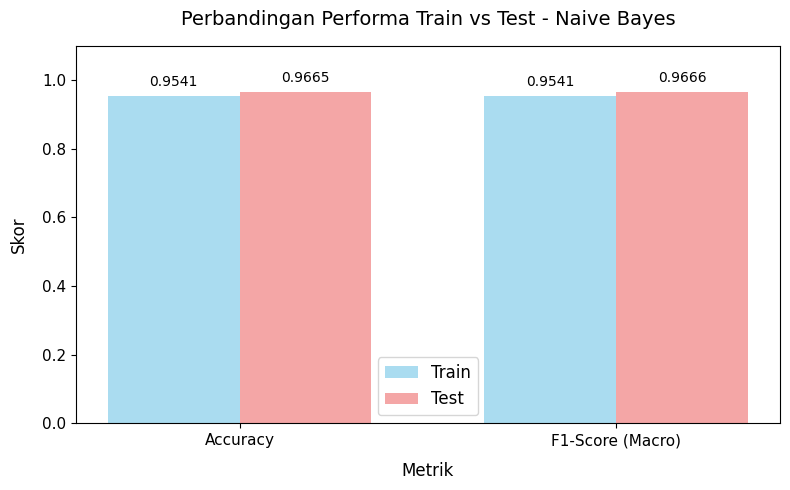


### Evaluasi Overfitting - Decision Tree ###
Akurasi Train: 1.0000, Akurasi Test: 0.9980, Selisih: 0.0020
F1-Score (Macro) Train: 1.0000, F1-Score (Macro) Test: 0.9981, Selisih: 0.0019
Status Model: Optimal (Selisih performa kecil dan performa test memadai)


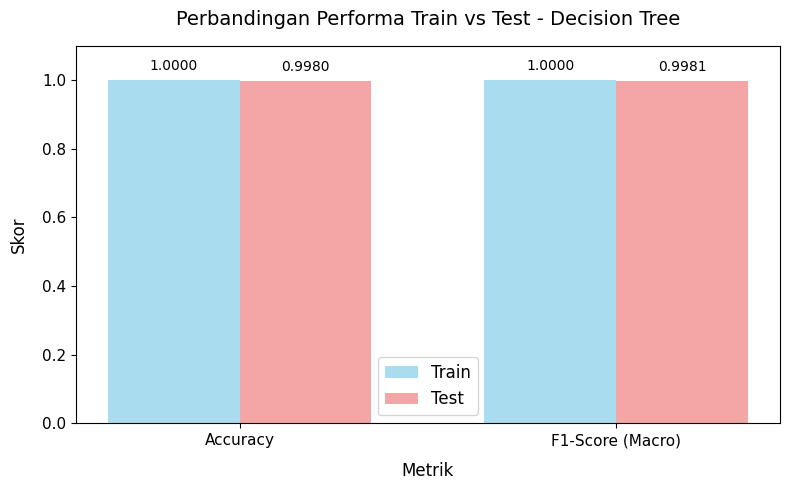

In [65]:
# 1. Evaluasi Overfitting dengan Membandingkan Performa Train dan Test
# Tujuan: Mengecek apakah ada gap besar antara performa train dan test dengan klasifikasi overfitting/underfitting.
def evaluate_overfitting(y_train, y_train_pred, y_test, y_test_pred, model_name):
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='macro', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)
    acc_diff = train_acc - test_acc
    f1_diff = train_f1 - test_f1

    print(f'\n### Evaluasi Overfitting - {model_name} ###')
    print(f'Akurasi Train: {train_acc:.4f}, Akurasi Test: {test_acc:.4f}, Selisih: {acc_diff:.4f}')
    print(f'F1-Score (Macro) Train: {train_f1:.4f}, F1-Score (Macro) Test: {test_f1:.4f}, Selisih: {f1_diff:.4f}')

    # Klasifikasi overfitting/underfitting berdasarkan selisih
    if acc_diff > 0.1 or f1_diff > 0.1:
        status = "Overfitting (Selisih performa terlalu besar)"
    elif test_acc < 0.7 or test_f1 < 0.7:
        status = "Underfitting (Performa test terlalu rendah)"
    else:
        status = "Optimal (Selisih performa kecil dan performa test memadai)"

    print(f'Status Model: {status}')

    # Persiapan data untuk visualisasi
    metrics = ['Accuracy', 'F1-Score (Macro)']
    train_scores = [train_acc, train_f1]
    test_scores = [test_acc, test_f1]

    # Visualisasi perbandingan performa
    plt.figure(figsize=(8, 5))
    bar_width = 0.35
    index = np.arange(len(metrics))

    plt.bar(index, train_scores, bar_width, label='Train', color='skyblue', alpha=0.7)
    plt.bar(index + bar_width, test_scores, bar_width, label='Test', color='lightcoral', alpha=0.7)

    plt.xlabel('Metrik', fontsize=12, labelpad=10)
    plt.ylabel('Skor', fontsize=12, labelpad=10)
    plt.title(f'Perbandingan Performa Train vs Test - {model_name}', fontsize=14, pad=15)
    plt.xticks(index + bar_width / 2, metrics, fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(fontsize=12)
    plt.ylim(0, 1.1)

    for i, (train, test) in enumerate(zip(train_scores, test_scores)):
        plt.text(i, train + 0.02, f'{train:.4f}', ha='center', va='bottom', fontsize=10, color='black')
        plt.text(i + bar_width, test + 0.02, f'{test:.4f}', ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

# Evaluasi overfitting untuk Naive Bayes
evaluate_overfitting(y_train, y_pred_nb_train, y_test, y_pred_nb_test, 'Naive Bayes')

# Evaluasi overfitting untuk Decision Tree
evaluate_overfitting(y_train, y_pred_dt_train, y_test, y_pred_dt_test, 'Decision Tree')

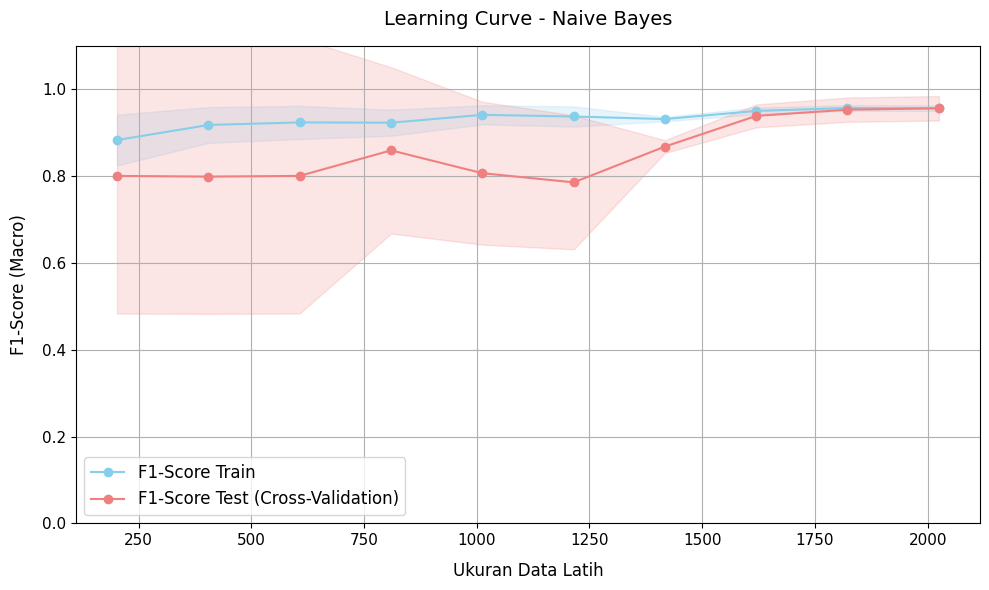

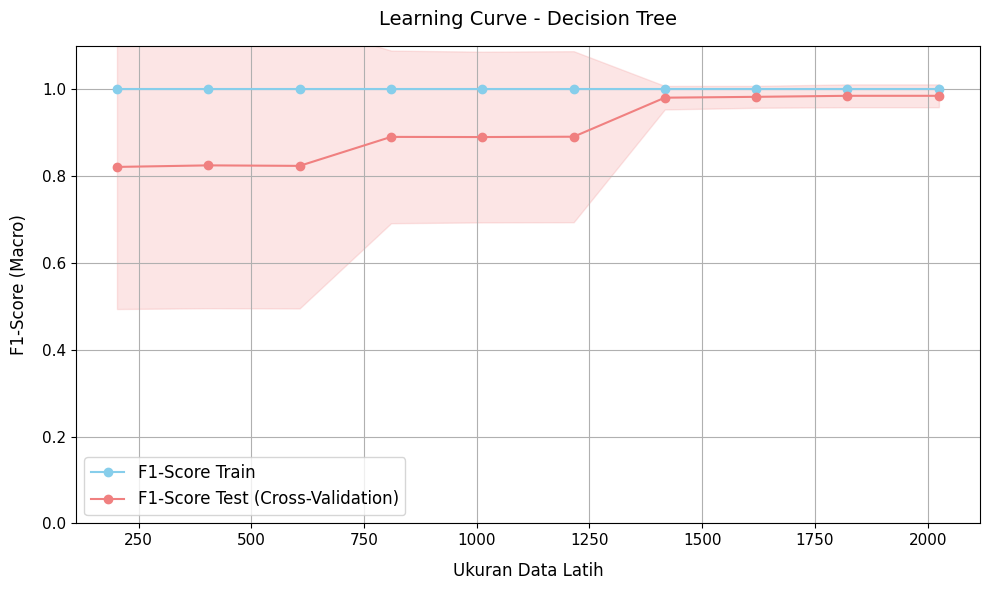

In [66]:
# 2. Learning Curve
# Tujuan: Memvisualisasikan performa model seiring bertambahnya ukuran data latih.
def plot_learning_curve(estimator, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='f1_macro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='F1-Score Train', color='skyblue', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='skyblue', alpha=0.2)
    plt.plot(train_sizes, test_mean, label='F1-Score Test (Cross-Validation)', color='lightcoral', marker='o')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='lightcoral', alpha=0.2)

    plt.xlabel('Ukuran Data Latih', fontsize=12, labelpad=10)
    plt.ylabel('F1-Score (Macro)', fontsize=12, labelpad=10)
    plt.title(f'Learning Curve - {model_name}', fontsize=14, pad=15)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.ylim(0, 1.1)
    plt.tight_layout()
    plt.show()

# Learning curve untuk Naive Bayes
plot_learning_curve(nb_model, X, y, 'Naive Bayes')

# Learning curve untuk Decision Tree
plot_learning_curve(dt_model, X, y, 'Decision Tree')

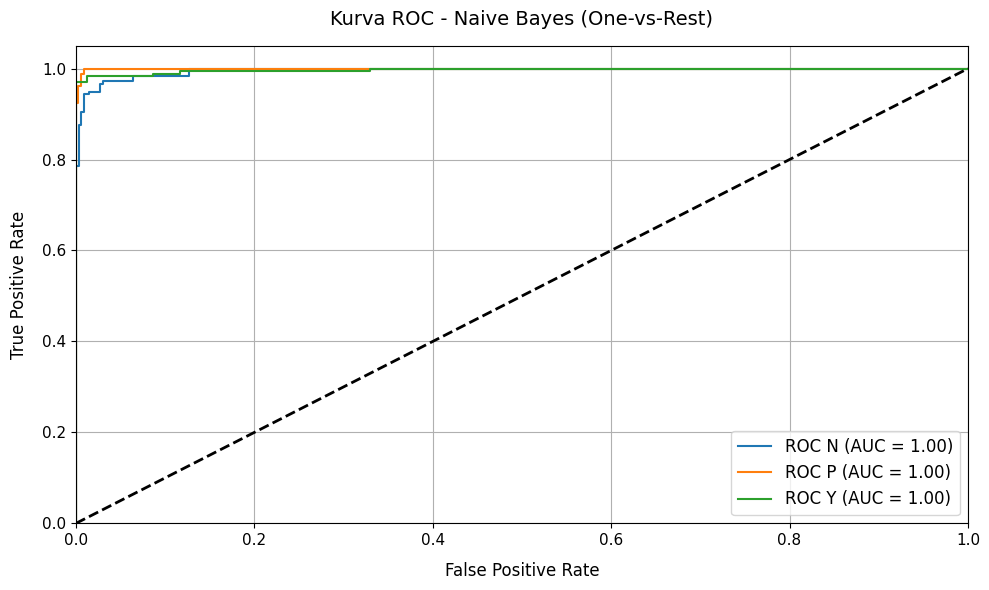

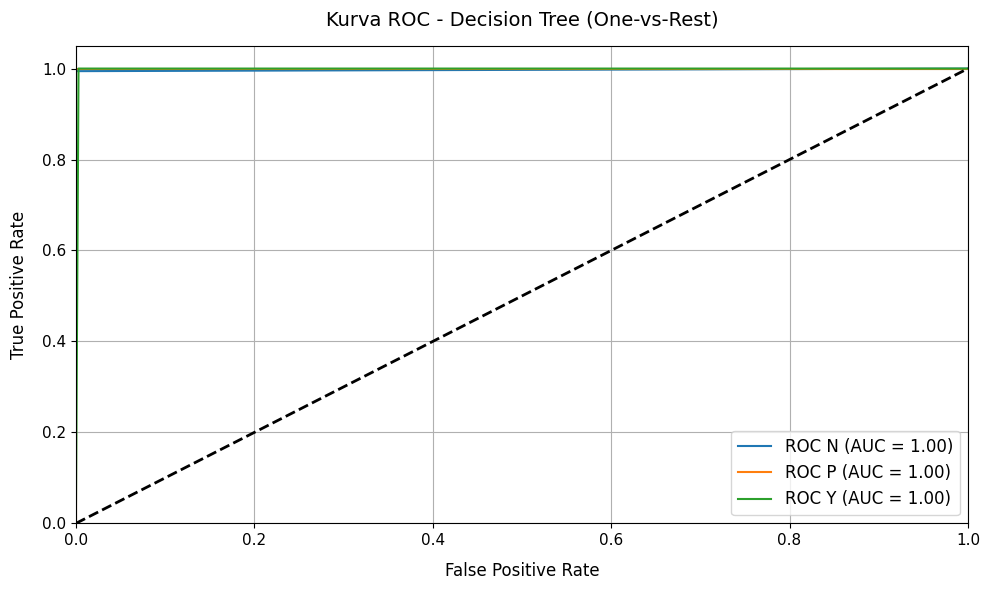

In [67]:
# 3. Visualisasi ROC-AUC (One-vs-Rest untuk Multiclass)
# Tujuan: Membuat kurva ROC untuk setiap kelas dan menghitung AUC.
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
classes = ['N', 'P', 'Y']

# ROC-AUC untuk Naive Bayes
plt.figure(figsize=(10, 6))
for i, label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_nb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC {label} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, labelpad=10)
plt.ylabel('True Positive Rate', fontsize=12, labelpad=10)
plt.title('Kurva ROC - Naive Bayes (One-vs-Rest)', fontsize=14, pad=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# ROC-AUC untuk Decision Tree
plt.figure(figsize=(10, 6))
for i, label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_dt[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC {label} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, labelpad=10)
plt.ylabel('True Positive Rate', fontsize=12, labelpad=10)
plt.title('Kurva ROC - Decision Tree (One-vs-Rest)', fontsize=14, pad=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Tahap Tuning dan Evaluasi untuk Dataset Diabetes

## Tujuan
- Tuning Parameter: Menyesuaikan parameter model untuk meningkatkan performa dan mengurangi overfitting, khususnya pada Decision Tree.
- Evaluasi Ulang: Mengevaluasi performa model pasca-tuning dengan metrik yang konsisten (akurasi, precision, recall, F1-Score, ROC-AUC) dan analisis overfitting.
- Perbandingan: Membandingkan hasil sebelum dan sesudah tuning untuk menentukan peningkatan.

## Langkah-langkah Tuning dan Evaluasi
1. Tuning Parameter:
- Naive Bayes: Menyesuaikan var_smoothing untuk meningkatkan stabilitas pada fitur dengan variance rendah.
- Decision Tree: Menyesuaikan max_depth, min_samples_split, dan min_samples_leaf untuk mengurangi overfitting.
2. Evaluasi Ulang:
- Menggunakan fungsi evaluate_model yang ada untuk mengevaluasi model yang telah dituning.
- Mengevaluasi overfitting dengan fungsi evaluate_overfitting.
3. Visualisasi dan Perbandingan:
- Menambahkan visualisasi perbandingan performa sebelum dan sesudah tuning.
- Menyertakan tabel perbandingan ringkas.

In [68]:
# Import library yang diperlukan
from sklearn.model_selection import GridSearchCV

In [69]:
# Model tanpa tuning (dari evaluasi sebelumnya)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb_no_tune = nb_model.predict(X_test)
y_prob_nb_no_tune = nb_model.predict_proba(X_test)
y_pred_nb_no_tune_train = nb_model.predict(X_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt_no_tune = dt_model.predict(X_test)
y_prob_dt_no_tune = dt_model.predict_proba(X_test)
y_pred_dt_no_tune_train = dt_model.predict(X_train)

In [70]:
# 1. Tuning Parameter dengan Log Periterasi
# Tuning untuk Naive Bayes
nb_param_grid = {'var_smoothing': np.logspace(0, -9, num=10)}
nb_grid = GridSearchCV(GaussianNB(), nb_param_grid, cv=5, scoring='f1_macro', n_jobs=-1, return_train_score=True, verbose=1)
nb_grid.fit(X_train, y_train)
nb_tuned_model = nb_grid.best_estimator_
print(f'\n### Log Periterasi Tuning - Naive Bayes ###')
for params, mean_score, std_score in zip(nb_grid.cv_results_['params'], nb_grid.cv_results_['mean_test_score'], nb_grid.cv_results_['std_test_score']):
    print(f'Parameter: {params}, F1-Score (Macro) CV Mean: {mean_score:.4f}, Std: {std_score:.4f}')
print(f'\n### Best Parameters for Naive Bayes: {nb_grid.best_params_}')
print(f'Best Cross-Validation F1-Score (Macro): {nb_grid.best_score_:.4f}')

# Tuning untuk Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='f1_macro', n_jobs=-1, return_train_score=True, verbose=1)
dt_grid.fit(X_train, y_train)
dt_tuned_model = dt_grid.best_estimator_
print(f'\n### Log Periterasi Tuning - Decision Tree ###')
for params, mean_score, std_score in zip(dt_grid.cv_results_['params'], dt_grid.cv_results_['mean_test_score'], dt_grid.cv_results_['std_test_score']):
    print(f'Parameter: {params}, F1-Score (Macro) CV Mean: {mean_score:.4f}, Std: {std_score:.4f}')
print(f'\n### Best Parameters for Decision Tree: {dt_grid.best_params_}')
print(f'Best Cross-Validation F1-Score (Macro): {dt_grid.best_score_:.4f}')

# Prediksi dengan model yang dituning
y_pred_nb_tune = nb_tuned_model.predict(X_test)
y_prob_nb_tune = nb_tuned_model.predict_proba(X_test)
y_pred_nb_tune_train = nb_tuned_model.predict(X_train)
y_pred_dt_tune = dt_tuned_model.predict(X_test)
y_prob_dt_tune = dt_tuned_model.predict_proba(X_test)
y_pred_dt_tune_train = dt_tuned_model.predict(X_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

### Log Periterasi Tuning - Naive Bayes ###
Parameter: {'var_smoothing': 1.0}, F1-Score (Macro) CV Mean: 0.8142, Std: 0.0150
Parameter: {'var_smoothing': 0.1}, F1-Score (Macro) CV Mean: 0.9163, Std: 0.0102
Parameter: {'var_smoothing': 0.01}, F1-Score (Macro) CV Mean: 0.9549, Std: 0.0033
Parameter: {'var_smoothing': 0.001}, F1-Score (Macro) CV Mean: 0.9535, Std: 0.0061
Parameter: {'var_smoothing': 0.0001}, F1-Score (Macro) CV Mean: 0.9511, Std: 0.0053
Parameter: {'var_smoothing': 1e-05}, F1-Score (Macro) CV Mean: 0.9511, Std: 0.0053
Parameter: {'var_smoothing': 1e-06}, F1-Score (Macro) CV Mean: 0.9511, Std: 0.0053
Parameter: {'var_smoothing': 1e-07}, F1-Score (Macro) CV Mean: 0.9511, Std: 0.0053
Parameter: {'var_smoothing': 1e-08}, F1-Score (Macro) CV Mean: 0.9511, Std: 0.0053
Parameter: {'var_smoothing': 1e-09}, F1-Score (Macro) CV Mean: 0.9511, Std: 0.0053

### Best Parameters for Naive Bayes: {'var_smoothing': 0.01}
Best C


### Evaluasi Naive Bayes (No Tune) ###
Akurasi: 0.9665
Precision (Macro): 0.9682
Recall (Macro): 0.9657
F1-Score (Macro): 0.9666
ROC-AUC (Macro, OvR): 0.9973

Metrik Per Kelas:
N: Precision=0.9399, Recall=0.9718, F1=0.9556
P: Precision=0.9933, Recall=0.9427, F1=0.9673
Y: Precision=0.9714, Recall=0.9827, F1=0.9770

Classification Report:
              precision    recall  f1-score   support

           N       0.94      0.97      0.96       177
           P       0.99      0.94      0.97       157
           Y       0.97      0.98      0.98       173

    accuracy                           0.97       507
   macro avg       0.97      0.97      0.97       507
weighted avg       0.97      0.97      0.97       507



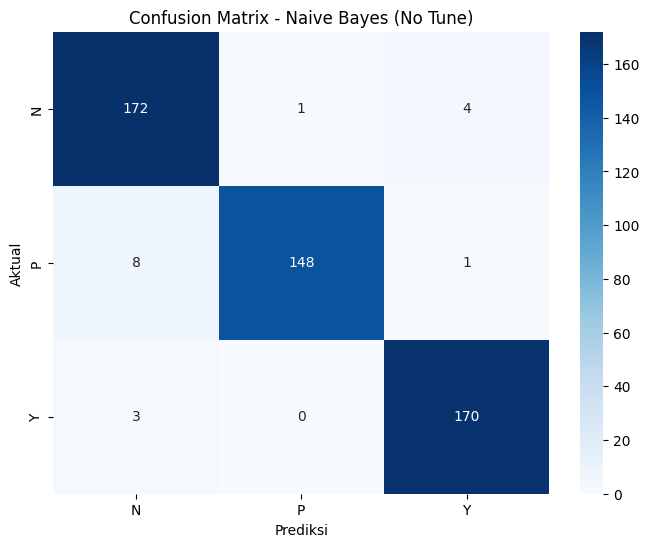


Jumlah data yang salah diklasifikasikan: 17
Contoh 5 data yang salah diklasifikasikan (posisi, aktual, prediksi):
Posisi 13: Aktual=N, Prediksi=Y
Posisi 66: Aktual=Y, Prediksi=N
Posisi 112: Aktual=P, Prediksi=N
Posisi 147: Aktual=Y, Prediksi=N
Posisi 150: Aktual=P, Prediksi=N

### Evaluasi Naive Bayes (Tune) ###
Akurasi: 0.9724
Precision (Macro): 0.9722
Recall (Macro): 0.9735
F1-Score (Macro): 0.9725
ROC-AUC (Macro, OvR): 0.9951

Metrik Per Kelas:
N: Precision=0.9824, Recall=0.9435, F1=0.9625
P: Precision=0.9573, Recall=1.0000, F1=0.9782
Y: Precision=0.9769, Recall=0.9769, F1=0.9769

Classification Report:
              precision    recall  f1-score   support

           N       0.98      0.94      0.96       177
           P       0.96      1.00      0.98       157
           Y       0.98      0.98      0.98       173

    accuracy                           0.97       507
   macro avg       0.97      0.97      0.97       507
weighted avg       0.97      0.97      0.97       507



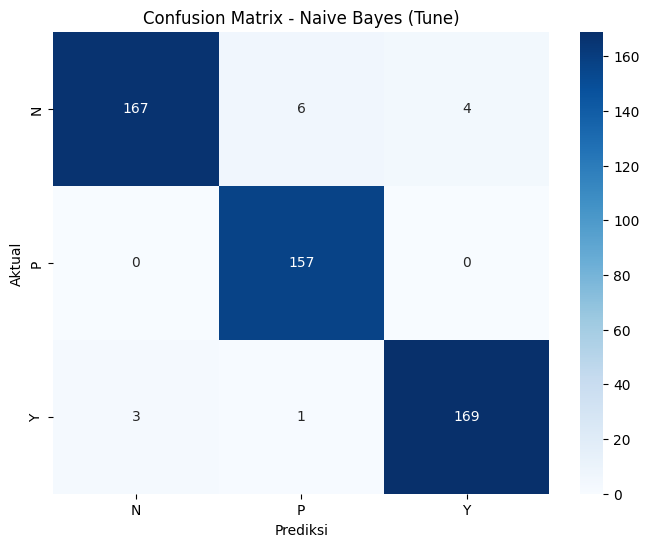


Jumlah data yang salah diklasifikasikan: 14
Contoh 5 data yang salah diklasifikasikan (posisi, aktual, prediksi):
Posisi 13: Aktual=N, Prediksi=Y
Posisi 31: Aktual=N, Prediksi=P
Posisi 66: Aktual=Y, Prediksi=N
Posisi 116: Aktual=N, Prediksi=P
Posisi 147: Aktual=Y, Prediksi=N

### Evaluasi Decision Tree (No Tune) ###
Akurasi: 0.9980
Precision (Macro): 0.9981
Recall (Macro): 0.9981
F1-Score (Macro): 0.9981
ROC-AUC (Macro, OvR): 0.9986

Metrik Per Kelas:
N: Precision=1.0000, Recall=0.9944, F1=0.9972
P: Precision=1.0000, Recall=1.0000, F1=1.0000
Y: Precision=0.9943, Recall=1.0000, F1=0.9971

Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.99      1.00       177
           P       1.00      1.00      1.00       157
           Y       0.99      1.00      1.00       173

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507



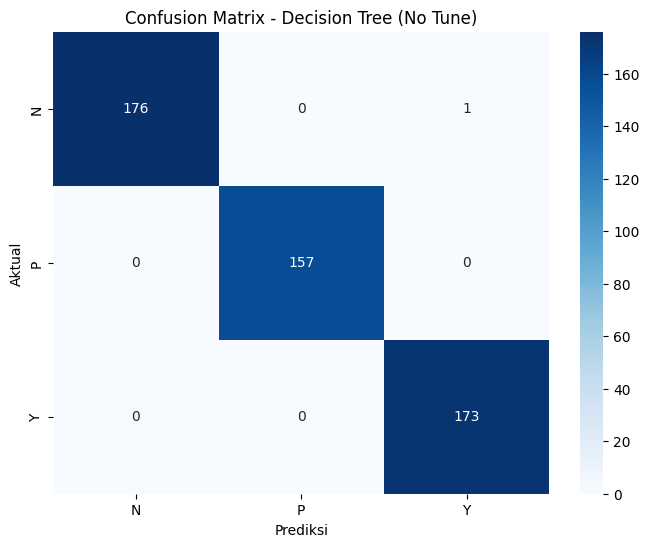


Jumlah data yang salah diklasifikasikan: 1
Contoh 5 data yang salah diklasifikasikan (posisi, aktual, prediksi):
Posisi 224: Aktual=N, Prediksi=Y

### Evaluasi Decision Tree (Tune) ###
Akurasi: 0.9961
Precision (Macro): 0.9962
Recall (Macro): 0.9962
F1-Score (Macro): 0.9962
ROC-AUC (Macro, OvR): 0.9984

Metrik Per Kelas:
N: Precision=0.9944, Recall=0.9944, F1=0.9944
P: Precision=1.0000, Recall=1.0000, F1=1.0000
Y: Precision=0.9942, Recall=0.9942, F1=0.9942

Classification Report:
              precision    recall  f1-score   support

           N       0.99      0.99      0.99       177
           P       1.00      1.00      1.00       157
           Y       0.99      0.99      0.99       173

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507



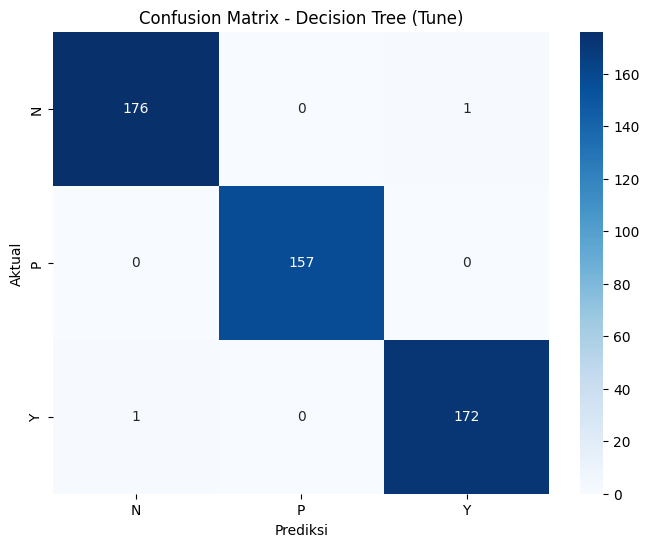


Jumlah data yang salah diklasifikasikan: 2
Contoh 5 data yang salah diklasifikasikan (posisi, aktual, prediksi):
Posisi 224: Aktual=N, Prediksi=Y
Posisi 306: Aktual=Y, Prediksi=N


In [78]:
# 2. Evaluasi Model
def evaluate_model(y_true, y_pred, y_prob, model_name, model=None):
    acc = accuracy_score(y_true, y_pred)
    prec_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
    roc_auc = roc_auc_score(LabelBinarizer().fit_transform(y_true), y_prob, average='macro', multi_class='ovr')
    prec_per_class = precision_score(y_true, y_pred, average=None, zero_division=0)
    rec_per_class = recall_score(y_true, y_pred, average=None, zero_division=0)
    f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0)

    cm = confusion_matrix(y_true, y_pred)
    print(f'\n### Evaluasi {model_name} ###')
    print(f'Akurasi: {acc:.4f}')
    print(f'Precision (Macro): {prec_macro:.4f}')
    print(f'Recall (Macro): {rec_macro:.4f}')
    print(f'F1-Score (Macro): {f1_macro:.4f}')
    print(f'ROC-AUC (Macro, OvR): {roc_auc:.4f}')
    print('\nMetrik Per Kelas:')
    for i, label in enumerate(['N', 'P', 'Y']):
        print(f'{label}: Precision={prec_per_class[i]:.4f}, Recall={rec_per_class[i]:.4f}, F1={f1_per_class[i]:.4f}')
    print('\nClassification Report:')
    print(classification_report(y_true, y_pred, zero_division=0))

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'P', 'Y'], yticklabels=['N', 'P', 'Y'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

    # Analisis Kesalahan
    errors = y_true != y_pred
    error_positions = np.where(errors)[0]  # Mendapatkan posisi (bukan indeks asli)
    print(f'\nJumlah data yang salah diklasifikasikan: {len(error_positions)}')
    if len(error_positions) > 0:
        print('Contoh 5 data yang salah diklasifikasikan (posisi, aktual, prediksi):')
        for pos in error_positions[:5]:
            print(f'Posisi {pos}: Aktual={y_true.iloc[pos]}, Prediksi={y_pred[pos]}')

    return acc, prec_macro, rec_macro, f1_macro, roc_auc

# Evaluasi semua variasi model
nb_no_tune_metrics = evaluate_model(y_test, y_pred_nb_no_tune, y_prob_nb_no_tune, 'Naive Bayes (No Tune)')
nb_tune_metrics = evaluate_model(y_test, y_pred_nb_tune, y_prob_nb_tune, 'Naive Bayes (Tune)')
dt_no_tune_metrics = evaluate_model(y_test, y_pred_dt_no_tune, y_prob_dt_no_tune, 'Decision Tree (No Tune)')
dt_tune_metrics = evaluate_model(y_test, y_pred_dt_tune, y_prob_dt_tune, 'Decision Tree (Tune)')


### Evaluasi Overfitting - Naive Bayes (No Tune) ###
Akurasi Train: 0.9541, Akurasi Test: 0.9665, Selisih: -0.0124
F1-Score (Macro) Train: 0.9541, F1-Score (Macro) Test: 0.9666, Selisih: -0.0125
Status Overfitting: Tidak Overfitting
Rekomendasi Tuning: Tuning tidak memberikan manfaat signifikan (peningkatan F1: 0.0059)


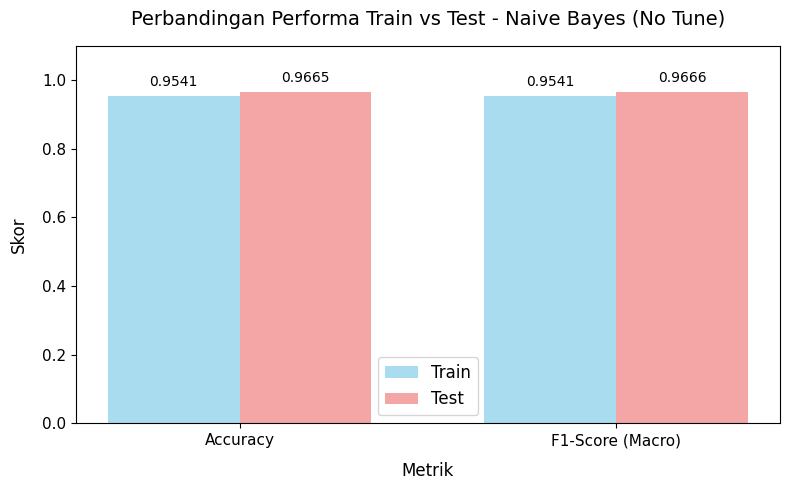


### Evaluasi Overfitting - Naive Bayes (Tune) ###
Akurasi Train: 0.9585, Akurasi Test: 0.9724, Selisih: -0.0139
F1-Score (Macro) Train: 0.9583, F1-Score (Macro) Test: 0.9725, Selisih: -0.0142
Status Overfitting: Tidak Overfitting
Rekomendasi Tuning: Tuning tidak memberikan manfaat signifikan (peningkatan F1: 0.0059)


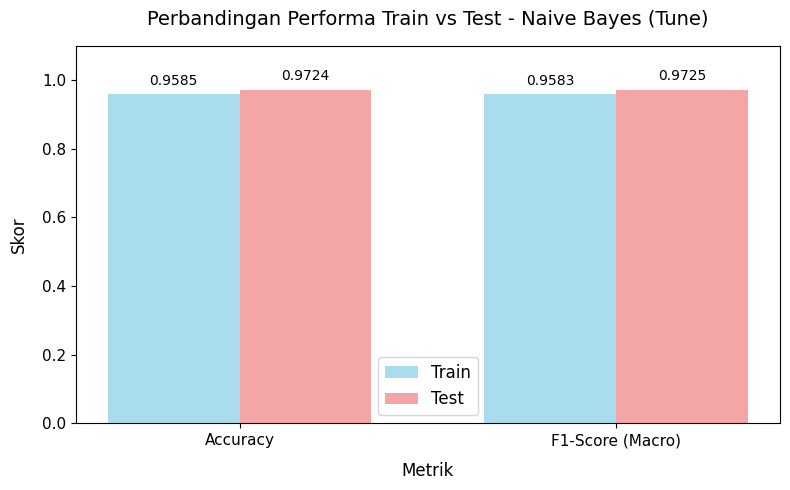


### Evaluasi Overfitting - Decision Tree (No Tune) ###
Akurasi Train: 1.0000, Akurasi Test: 0.9980, Selisih: 0.0020
F1-Score (Macro) Train: 1.0000, F1-Score (Macro) Test: 0.9981, Selisih: 0.0019
Status Overfitting: Tidak Overfitting
Rekomendasi Tuning: Tuning tidak memberikan manfaat signifikan (peningkatan F1: -0.0019)


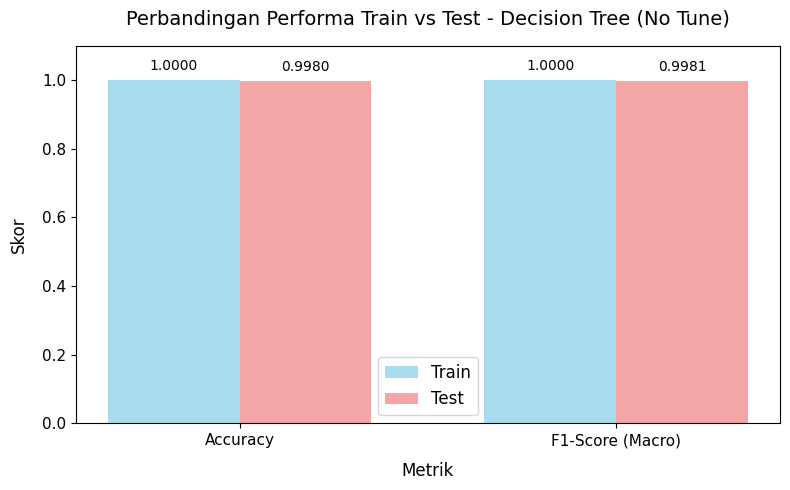


### Evaluasi Overfitting - Decision Tree (Tune) ###
Akurasi Train: 0.9980, Akurasi Test: 0.9961, Selisih: 0.0020
F1-Score (Macro) Train: 0.9980, F1-Score (Macro) Test: 0.9962, Selisih: 0.0018
Status Overfitting: Tidak Overfitting
Rekomendasi Tuning: Tuning tidak memberikan manfaat signifikan (peningkatan F1: -0.0019)


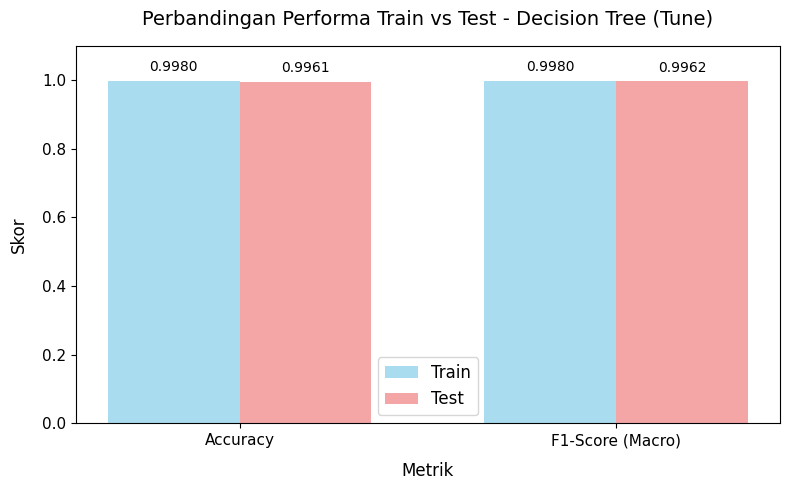

In [72]:
# 3. Evaluasi Overfitting dengan Logika If-Else Lebih Baik
def evaluate_overfitting_with_tuning(y_train, y_train_pred, y_test, y_test_pred, model_name, original_f1, tuned_f1):
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='macro', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)
    acc_diff = train_acc - test_acc
    f1_diff = train_f1 - test_f1
    f1_improvement = tuned_f1[3] - original_f1[3] if 'Tune' in model_name else 0

    print(f'\n### Evaluasi Overfitting - {model_name} ###')
    print(f'Akurasi Train: {train_acc:.4f}, Akurasi Test: {test_acc:.4f}, Selisih: {acc_diff:.4f}')
    print(f'F1-Score (Macro) Train: {train_f1:.4f}, F1-Score (Macro) Test: {test_f1:.4f}, Selisih: {f1_diff:.4f}')

    if acc_diff > 0.15 or f1_diff > 0.15:
        overfitting_status = "Kuat Overfitting"
    elif acc_diff > 0.05 or f1_diff > 0.05:
        overfitting_status = "Sedang Overfitting"
    elif test_acc < 0.7 or test_f1 < 0.7:
        underfitting_status = "Underfitting"
    else:
        overfitting_status = "Tidak Overfitting"

    tuning_benefit = f1_improvement > 0.02  # Peningkatan F1 > 2% dianggap signifikan
    if 'Tune' in model_name:
        if tuning_benefit:
            tuning_recommendation = "Tuning memberikan manfaat signifikan (peningkatan F1: {:.4f})".format(f1_improvement)
        else:
            tuning_recommendation = "Tuning tidak memberikan manfaat signifikan (peningkatan F1: {:.4f})".format(f1_improvement)
    else:
        tuning_recommendation = "Tidak ada tuning untuk dibandingkan"

    print(f'Status Overfitting: {overfitting_status}')
    print(f'Rekomendasi Tuning: {tuning_recommendation}')

    metrics = ['Accuracy', 'F1-Score (Macro)']
    train_scores = [train_acc, train_f1]
    test_scores = [test_acc, test_f1]

    plt.figure(figsize=(8, 5))
    bar_width = 0.35
    index = np.arange(len(metrics))
    plt.bar(index, train_scores, bar_width, label='Train', color='skyblue', alpha=0.7)
    plt.bar(index + bar_width, test_scores, bar_width, label='Test', color='lightcoral', alpha=0.7)
    plt.xlabel('Metrik', fontsize=12, labelpad=10)
    plt.ylabel('Skor', fontsize=12, labelpad=10)
    plt.title(f'Perbandingan Performa Train vs Test - {model_name}', fontsize=14, pad=15)
    plt.xticks(index + bar_width / 2, metrics, fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(fontsize=12)
    plt.ylim(0, 1.1)
    for i, (train, test) in enumerate(zip(train_scores, test_scores)):
        plt.text(i, train + 0.02, f'{train:.4f}', ha='center', va='bottom', fontsize=10, color='black')
        plt.text(i + bar_width, test + 0.02, f'{test:.4f}', ha='center', va='bottom', fontsize=10, color='black')
    plt.tight_layout()
    plt.show()

# Evaluasi overfitting untuk semua variasi
evaluate_overfitting_with_tuning(y_train, y_pred_nb_no_tune_train, y_test, y_pred_nb_no_tune, 'Naive Bayes (No Tune)', nb_no_tune_metrics, nb_tune_metrics)
evaluate_overfitting_with_tuning(y_train, y_pred_nb_tune_train, y_test, y_pred_nb_tune, 'Naive Bayes (Tune)', nb_no_tune_metrics, nb_tune_metrics)
evaluate_overfitting_with_tuning(y_train, y_pred_dt_no_tune_train, y_test, y_pred_dt_no_tune, 'Decision Tree (No Tune)', dt_no_tune_metrics, dt_tune_metrics)
evaluate_overfitting_with_tuning(y_train, y_pred_dt_tune_train, y_test, y_pred_dt_tune, 'Decision Tree (Tune)', dt_no_tune_metrics, dt_tune_metrics)

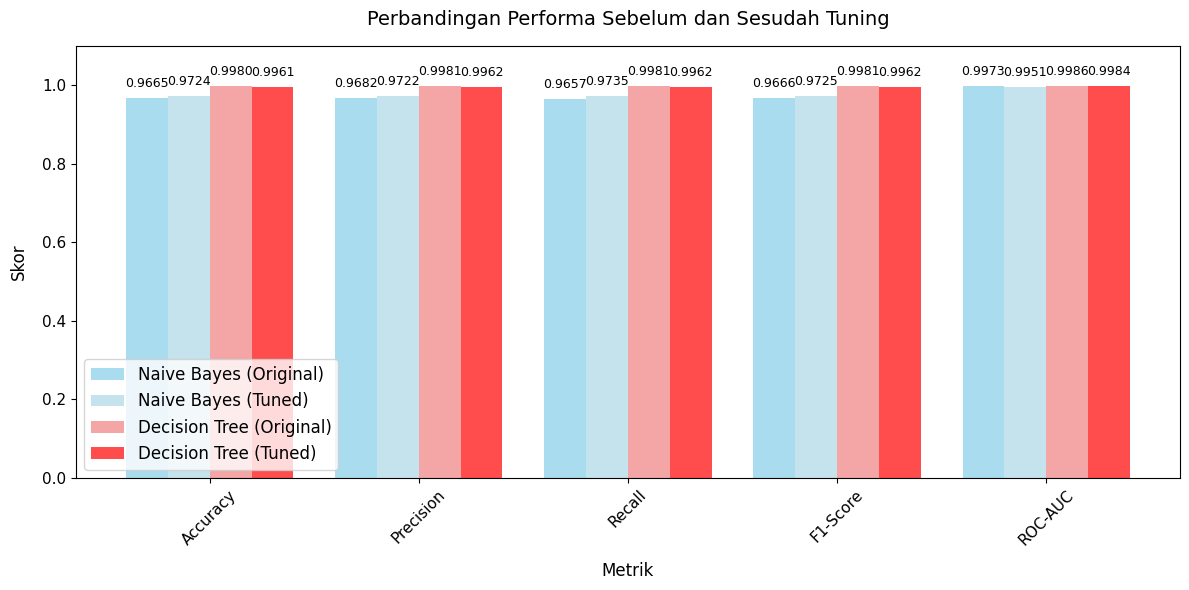

In [73]:
# 4. Visualisasi dan Perbandingan Performa Sebelum dan Sesudah Tuning
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
nb_original_scores = list(nb_metrics)  # Dari evaluasi sebelumnya
dt_original_scores = list(dt_metrics)  # Dari evaluasi sebelumnya
nb_tuned_scores = list(nb_tune_metrics)
dt_tuned_scores = list(dt_tune_metrics)

plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(metrics))

plt.bar(index, nb_original_scores, bar_width, label='Naive Bayes (Original)', alpha=0.7, color='skyblue')
plt.bar(index + bar_width, nb_tuned_scores, bar_width, label='Naive Bayes (Tuned)', alpha=0.7, color='lightblue')
plt.bar(index + 2 * bar_width, dt_original_scores, bar_width, label='Decision Tree (Original)', alpha=0.7, color='lightcoral')
plt.bar(index + 3 * bar_width, dt_tuned_scores, bar_width, label='Decision Tree (Tuned)', alpha=0.7, color='red')

plt.xlabel('Metrik', fontsize=12, labelpad=10)
plt.ylabel('Skor', fontsize=12, labelpad=10)
plt.title('Perbandingan Performa Sebelum dan Sesudah Tuning', fontsize=14, pad=15)
plt.xticks(index + 1.5 * bar_width, metrics, fontsize=11, rotation=45)
plt.yticks(fontsize=11)
plt.legend(fontsize=12)
plt.ylim(0, 1.1)

for i, (nb_orig, nb_tuned, dt_orig, dt_tuned) in enumerate(zip(nb_original_scores, nb_tuned_scores, dt_original_scores, dt_tuned_scores)):
    plt.text(i, nb_orig + 0.02, f'{nb_orig:.4f}', ha='center', va='bottom', fontsize=9, color='black')
    plt.text(i + bar_width, nb_tuned + 0.02, f'{nb_tuned:.4f}', ha='center', va='bottom', fontsize=9, color='black')
    plt.text(i + 2 * bar_width, dt_orig + 0.02, f'{dt_orig:.4f}', ha='center', va='bottom', fontsize=9, color='black')
    plt.text(i + 3 * bar_width, dt_tuned + 0.02, f'{dt_tuned:.4f}', ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

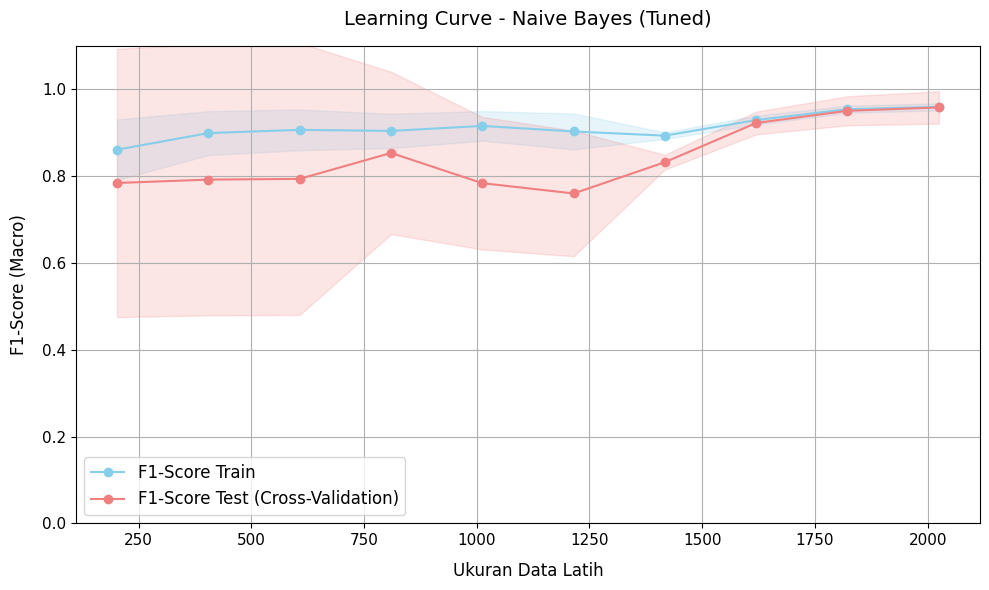

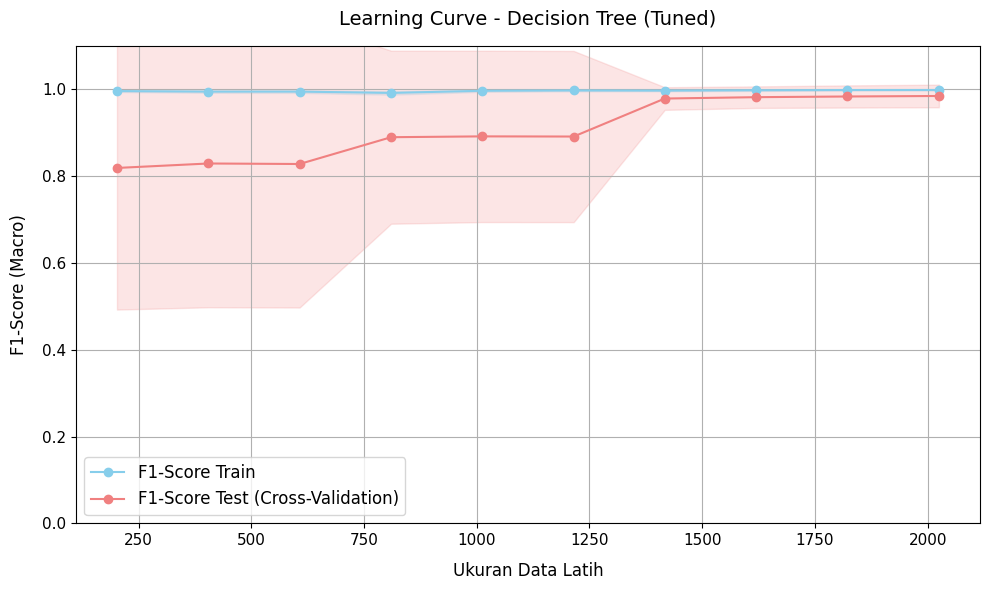

In [74]:
# Kurva pembelajaran untuk Naive Bayes setelah tuning
plot_learning_curve(nb_tuned_model, X, y, 'Naive Bayes (Tuned)')

# Kurva pembelajaran untuk Decision Tree setelah tuning
plot_learning_curve(dt_tuned_model, X, y, 'Decision Tree (Tuned)')

In [75]:
# 5. Tabel Perbandingan Ringkas
comparison_df = pd.DataFrame({
    'Metrik': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)', 'ROC-AUC (Macro, OvR)'],
    'Naive Bayes (Original)': [f'{nb:.4f}' for nb in nb_original_scores],
    'Naive Bayes (Tuned)': [f'{nb:.4f}' for nb in nb_tuned_scores],
    'Decision Tree (Original)': [f'{dt:.4f}' for dt in dt_original_scores],
    'Decision Tree (Tuned)': [f'{dt:.4f}' for dt in dt_tuned_scores]
})
print('\n### Tabel Perbandingan Performa Sebelum dan Sesudah Tuning ###')
print(comparison_df)


### Tabel Perbandingan Performa Sebelum dan Sesudah Tuning ###
                 Metrik Naive Bayes (Original) Naive Bayes (Tuned)  \
0              Accuracy                 0.9665              0.9724   
1     Precision (Macro)                 0.9682              0.9722   
2        Recall (Macro)                 0.9657              0.9735   
3      F1-Score (Macro)                 0.9666              0.9725   
4  ROC-AUC (Macro, OvR)                 0.9973              0.9951   

  Decision Tree (Original) Decision Tree (Tuned)  
0                   0.9980                0.9961  
1                   0.9981                0.9962  
2                   0.9981                0.9962  
3                   0.9981                0.9962  
4                   0.9986                0.9984  


# KESIMPULAN DAN REKOMENDASI

| Model         | Tuning         | Akurasi | F1-Score | Jumlah Salah Klasifikasi | Status Overfitting | Peningkatan F1 | Kesimpulan                                              |
|---------------|----------------|---------|----------|---------------------------|---------------------|----------------|----------------------------------------------------------|
| Naive Bayes   | Tanpa Tuning   | 9.665   | 9.666    | 17                        | Tidak Overfitting   | -              | Tuning sedikit membantu, tapi tidak signifikan           |
| Naive Bayes   | Dengan Tuning  | 9.724   | 9.725    | 14                        | Tidak Overfitting   | 0,0059         |                                                          |
| Decision Tree | Tanpa Tuning   | 9.980   | 9.981    | 1                         | Tidak Overfitting   | -              | Tanpa tuning sudah sangat baik, tuning tidak perlu       |
| Decision Tree | Dengan Tuning  | 9.961   | 9.962    | 2                         | Tidak Overfitting   | -0,0019        |                                                          |


Decision Tree jauh lebih baik daripada Naive Bayes (akurasi dan F1-Score hampir sempurna, kesalahan sangat sedikit).

Gunakan Decision Tree tanpa tuning untuk hasil terbaik (akurasi tinggi, minim kesalahan).